In [27]:
# Step 01: add the codition and intersection columns to the raw data files 
# Save to the "condition_behavior" folder
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

base_dir = 'S:\\GSani\\JieSong\\1.Data\\raw_data'
input_dir = os.path.join(base_dir, 'sub05', 'behavior')
out_dir = os.path.join(base_dir, 'sub05', 'condition_behavior')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
# loop through run numbers
for run_number in range(1, 7):
    # construct file patterns
    condition_retra = os.path.join(base_dir, 'conditions', f'RepRet_Run{run_number:02}_*_Retracing.csv')
    condition_repe = os.path.join(base_dir, 'conditions', f'RepRet_Run{run_number:02}_*_Repetition.csv')
    input_retra = os.path.join(input_dir, f'sub05_RepRet_Run{run_number:02}_*_Retracing.csv')
    input_repe = os.path.join(input_dir, f'sub05_RepRet_Run{run_number:02}_*_Repetition.csv')
    
    # find matching files for repetition and retracing
    condition_files_retra = glob.glob(condition_retra)
    condition_files_repe = glob.glob(condition_repe)
    input_files_retra = glob.glob(input_retra)
    input_files_repe = glob.glob(input_repe)
    
    # check if files exist
    if not input_files_retra or not condition_files_retra or not input_files_repe:
        continue
    
    # iterate through matching files in retracing
    for condition_file_retra, condition_file_repe, input_file_retra, input_file_repe in zip(condition_files_retra, condition_files_repe, input_files_retra, input_files_repe):
        # Load right CSV files
        right_df_retra = pd.read_csv(condition_file_retra)
        right_df_repe = pd.read_csv(condition_file_repe)
        left_df_retra = pd.read_csv(input_file_retra)
        left_df_repe = pd.read_csv(input_file_repe)
        
        # Add the new columns from right_df to left_df for retracing
        left_df_retra['Condition'] = right_df_retra['Condition']
        left_df_retra['Intersection'] = right_df_retra['Intersection']
        
        # Add the new columns from right_df to left_df for repetition
        left_df_repe['Condition'] = right_df_repe['Condition']
        left_df_repe['Intersection'] = right_df_repe['Intersection']

        # save the modified left_df to CSV for retracing
        file_name_retra = os.path.basename(input_file_retra)
        merged_file_path_retra = os.path.join(out_dir, file_name_retra)
        left_df_retra.to_csv(merged_file_path_retra, index=False)
        
        # save the modified left_df to CSV for repetition
        file_name_repe = os.path.basename(input_file_repe)
        merged_file_path_repe = os.path.join(out_dir, file_name_repe)
        left_df_repe.to_csv(merged_file_path_repe, index=False)


In [31]:
# Step 02: merge the excel file to one single file per run
# One behavior file and one timeline file per run
# Save to the "merged_behavior" and "merged_timeline" folders
import glob
import os
import pandas as pd
import numpy as np
# Find and filter the CSV files
base_dir = 'S:/GSani/JieSong/1.Data/raw_data'
input_dir = f'{base_dir}/sub05/behavior'
input_files1 = [file for file in glob.glob(f"{input_dir}/sub05_RepRet_Run*_*_*.csv") 
                if "Timeline" not in os.path.basename(file)]
input_files2 = glob.glob(f"{input_dir}/sub05_RepRet_Run*_*_*_Timeline.csv")
out_dir1 = f'{base_dir}/sub05/merged_behavior'
out_dir2 = f'{base_dir}/sub05/merged_timeline'
if not os.path.exists(out_dir1):
    os.makedirs(out_dir1)
if not os.path.exists(out_dir2):
    os.makedirs(out_dir2)
# Step 2: Define a function to merge and save files for each run for input_files1
def merge_and_save(files, run_number, out_dir):
    run_files_01 = [file for file in files if f"Run{run_number:02}_01_" in file]
    run_files_02 = [file for file in files if f"Run{run_number:02}_02_" in file]
    # Check if any of the files contain "Timeline"
    contains_timeline = any("Timeline" in file for file in files)
    df1 = pd.read_csv(run_files_01[0], header=None, sep='\t')
    df2 = pd.read_csv(run_files_02[0], header=None, sep='\t')
    # Concatenate df1 above df2
    merged_df_behavior = pd.concat([df1, df2], ignore_index=True) 
    # Define merged file path based on presence of "Timeline"
    if contains_timeline:
        merged_file_path = os.path.join(out_dir, f"sub-05_task-rep_ret_run-{run_number:02}_Timeline.csv")
    else:
        merged_file_path = os.path.join(out_dir, f"sub-05_task-rep_ret_run-{run_number:02}.csv")
    merged_df_behavior.to_csv(merged_file_path, index=False, header=False, sep='\t')

# Loop through run numbers
for run_number in range(1, 7):
    merge_and_save(input_files1, run_number, out_dir1)
    merge_and_save(input_files2, run_number, out_dir2)


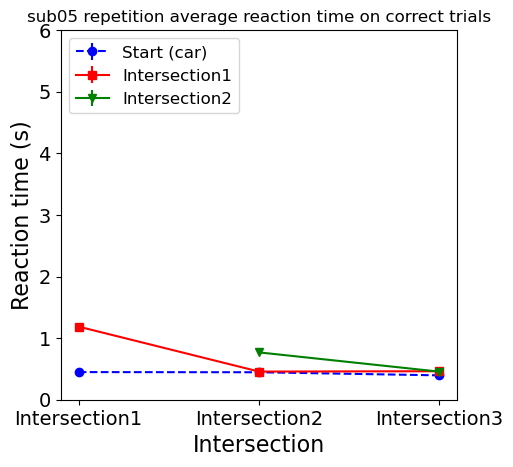

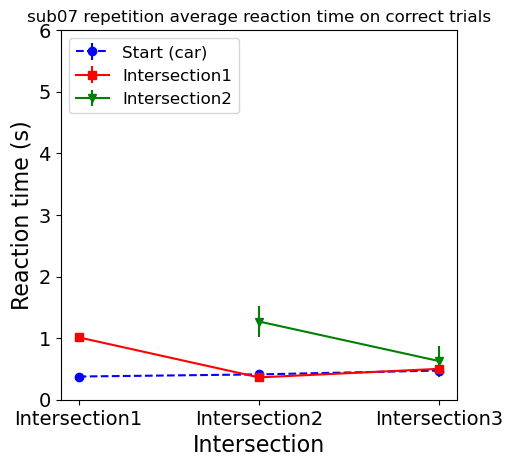

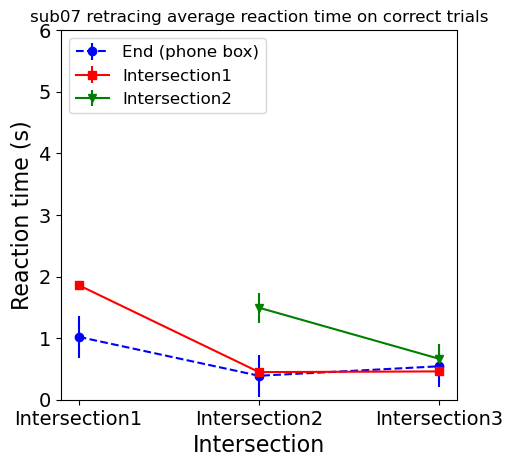

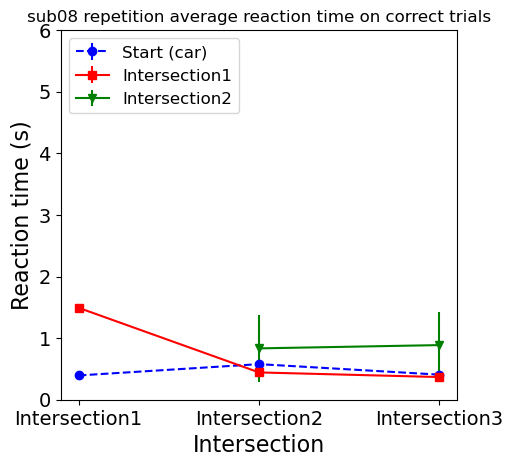

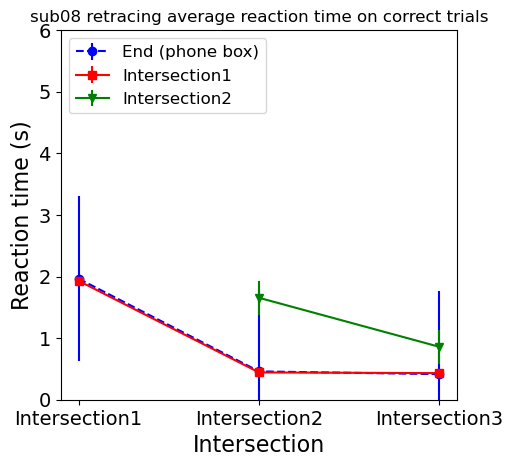

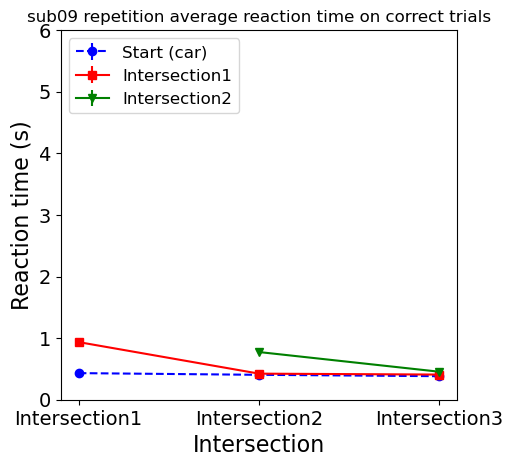

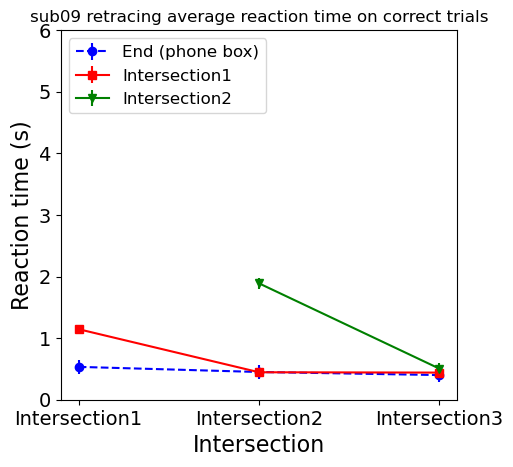

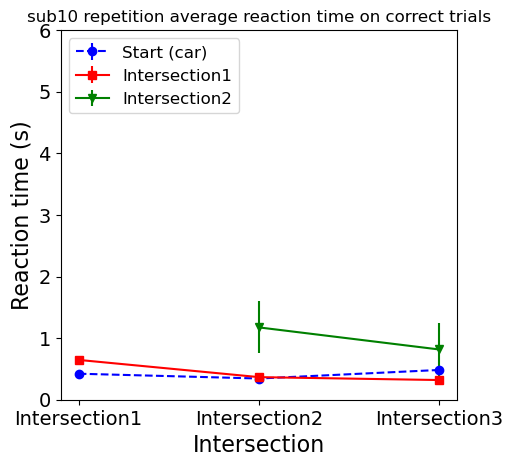

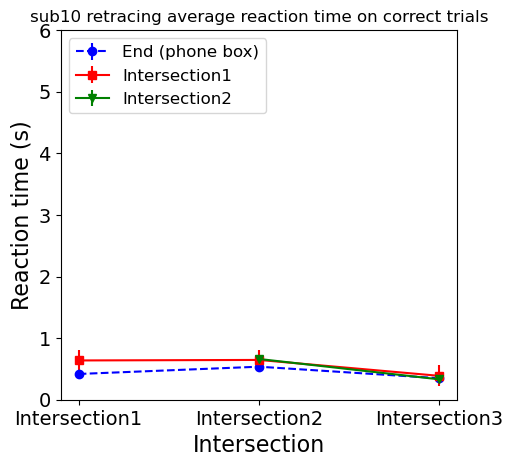

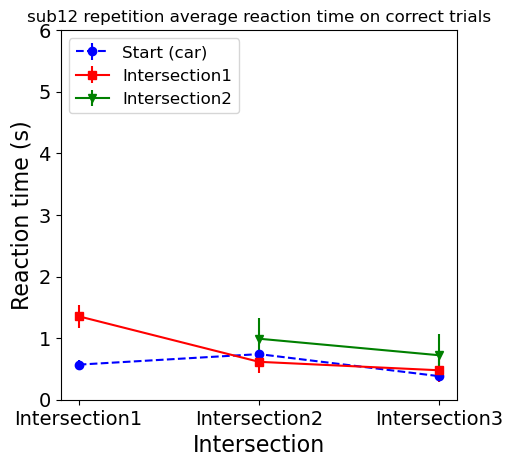

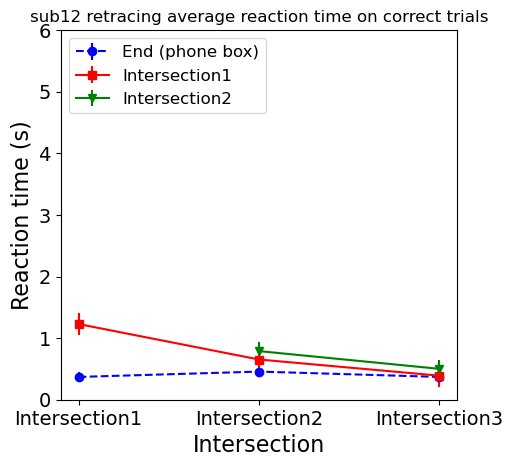

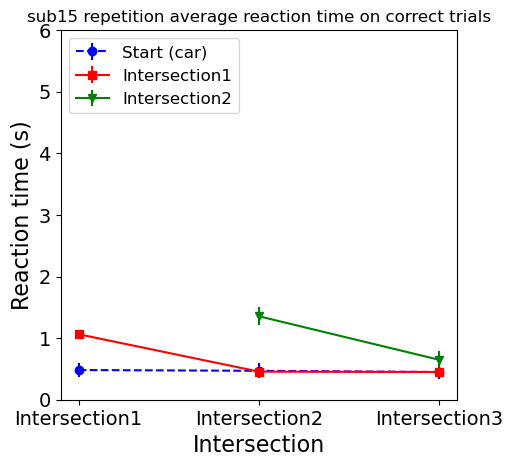

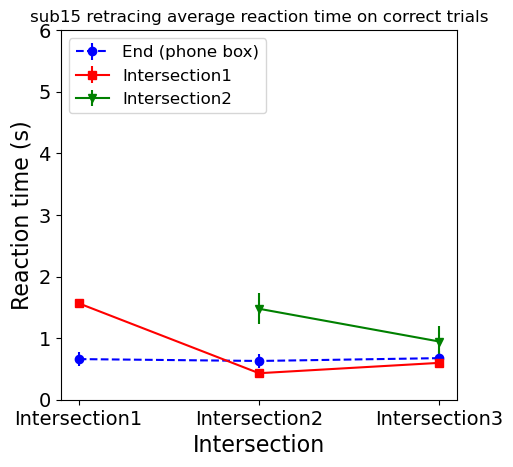

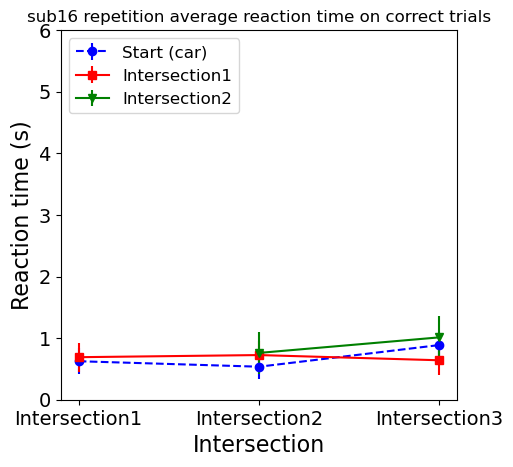

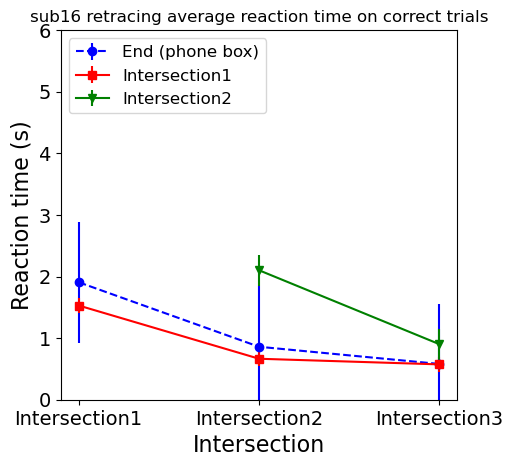

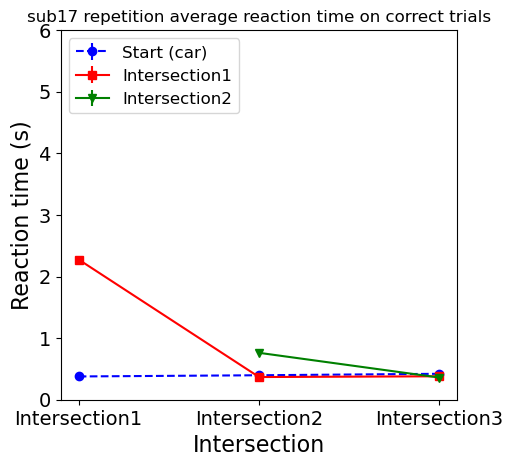

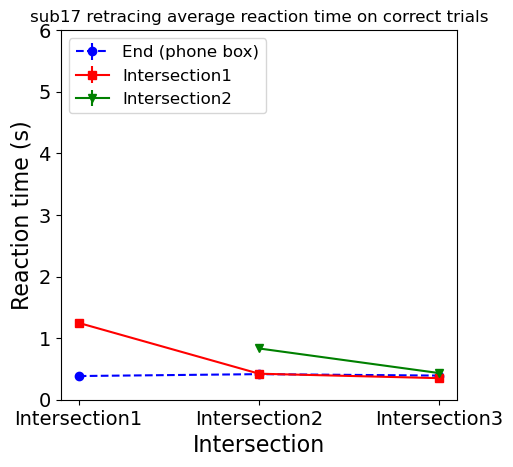

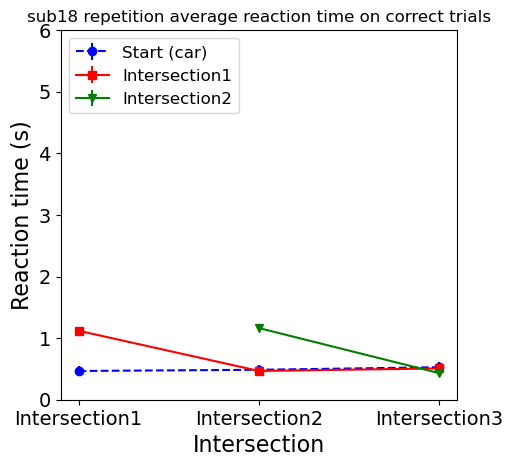

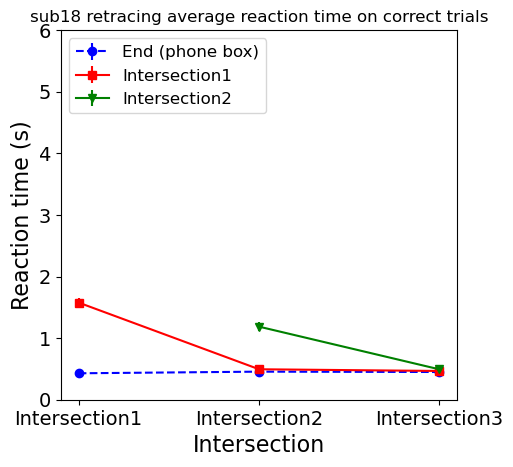

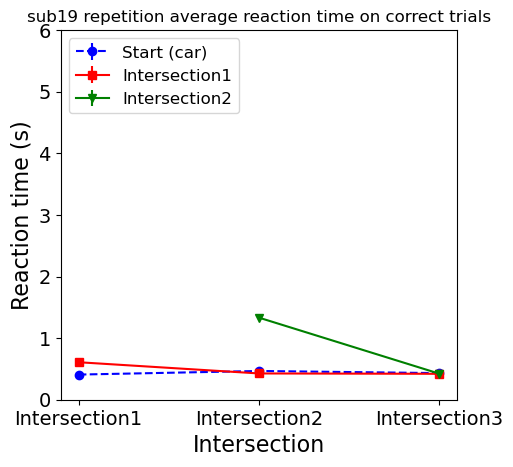

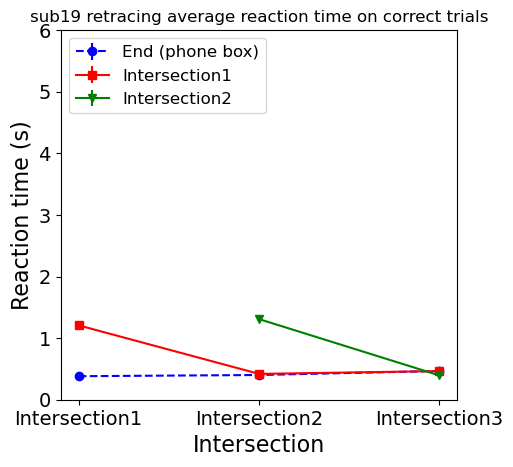

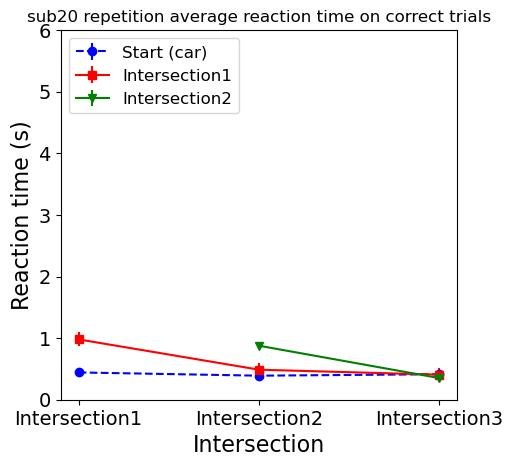

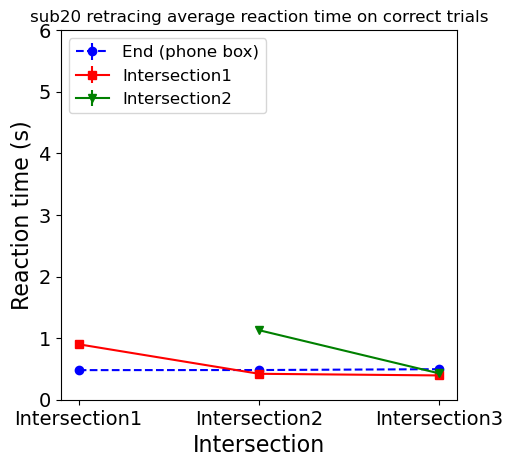

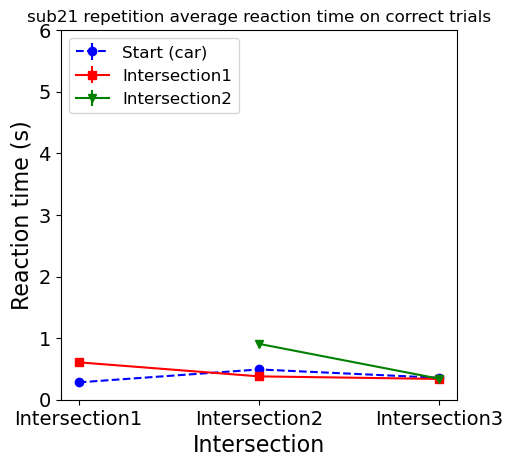

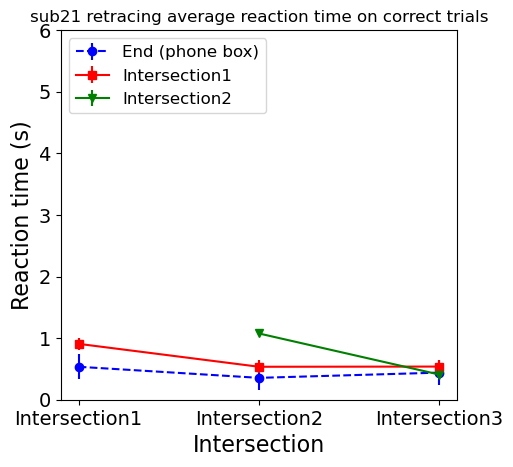

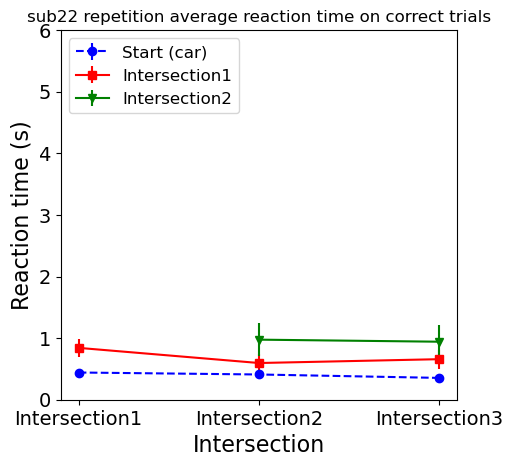

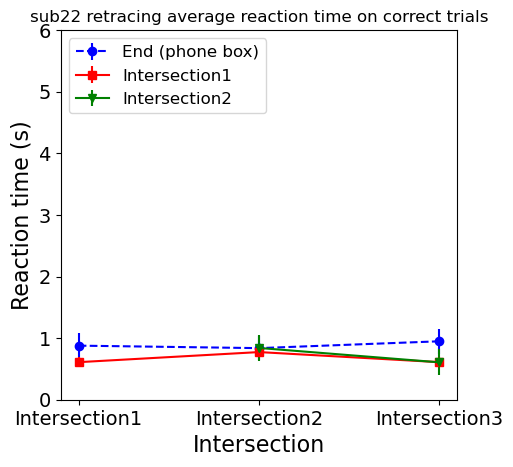

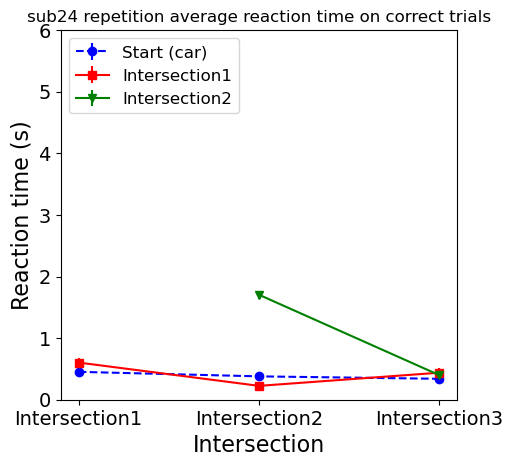

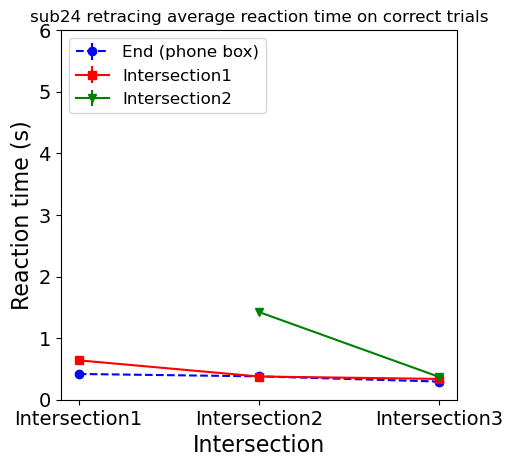

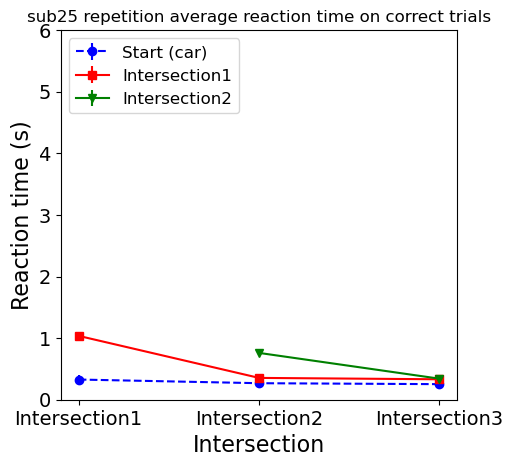

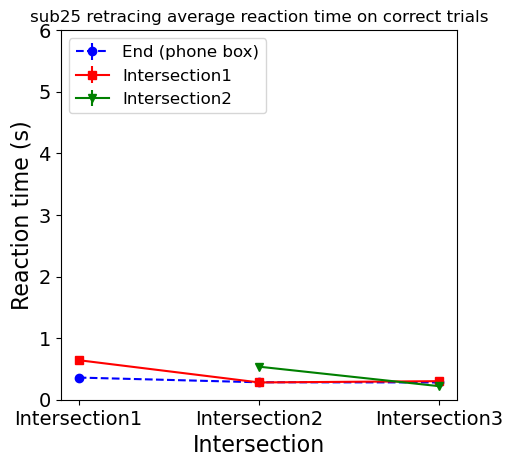

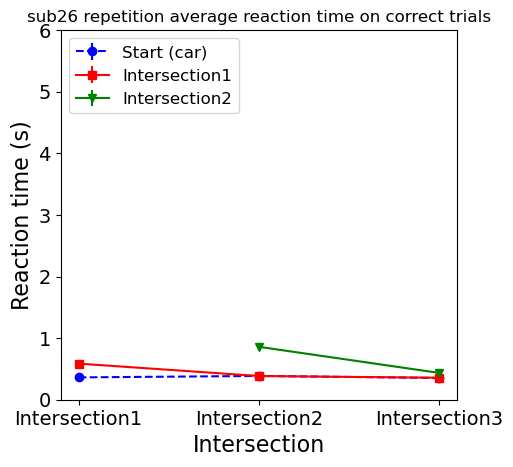

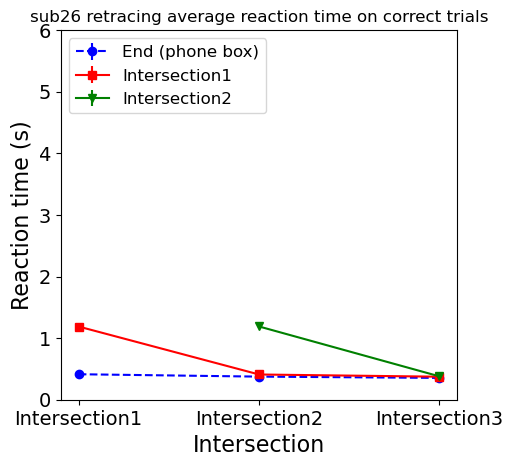

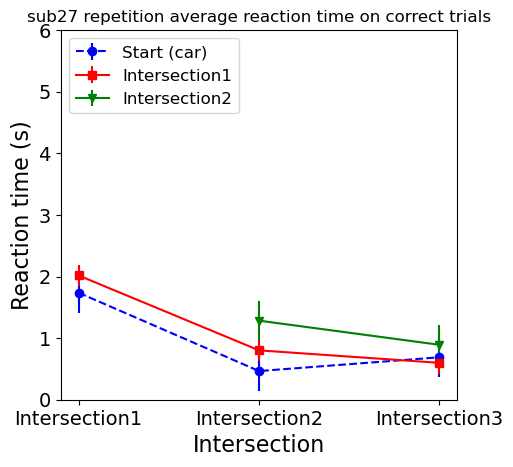

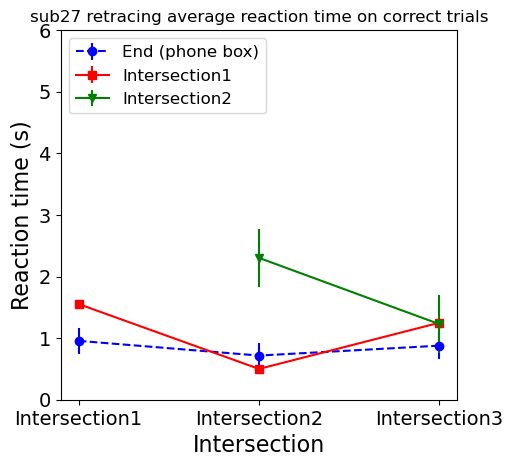

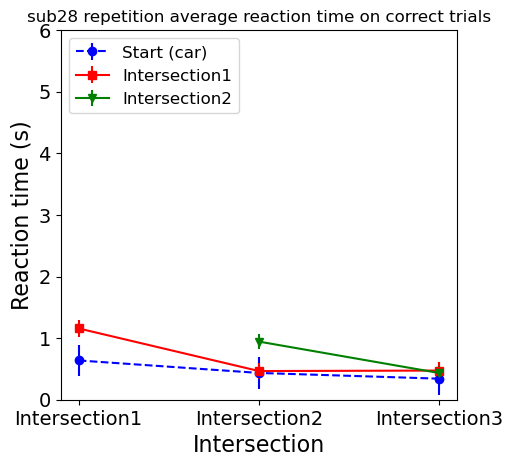

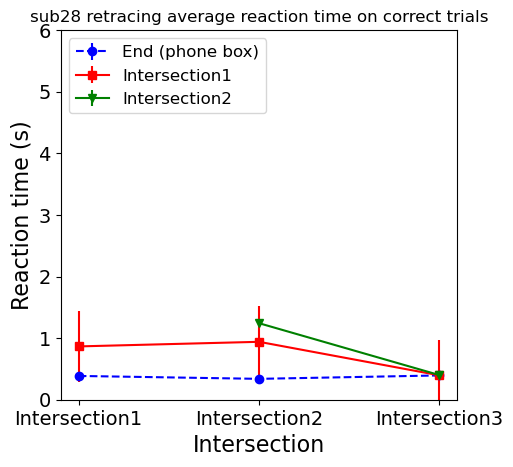

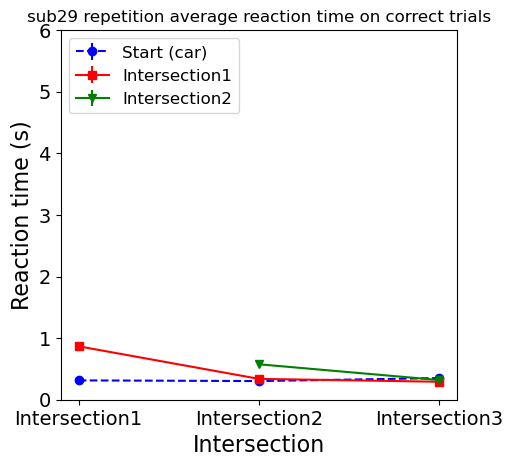

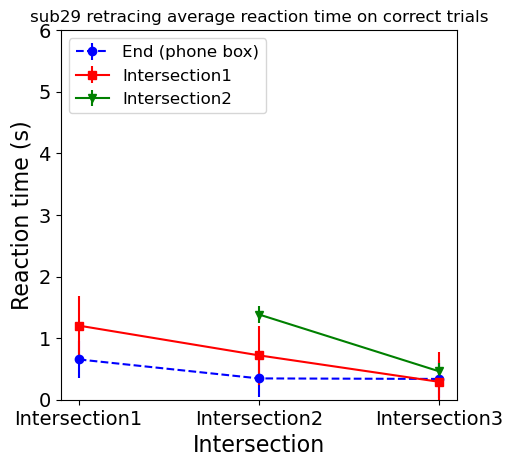

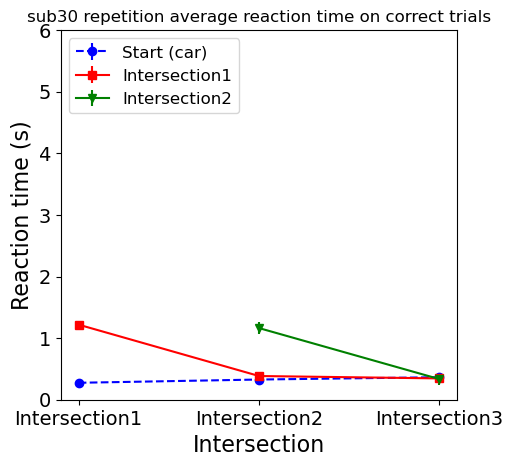

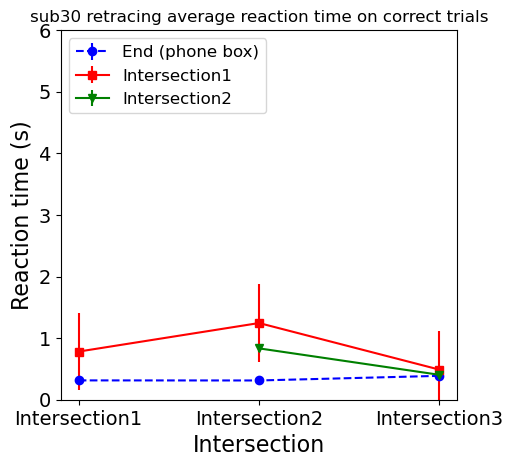

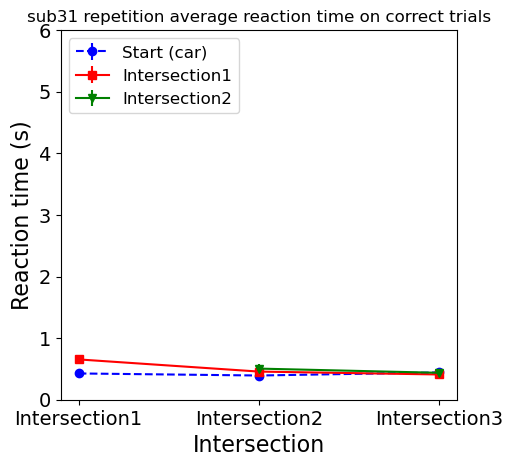

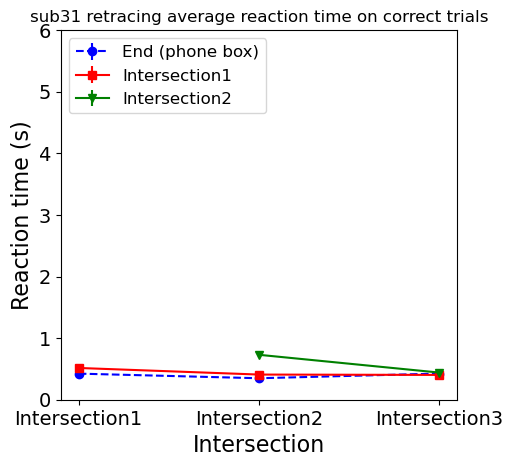

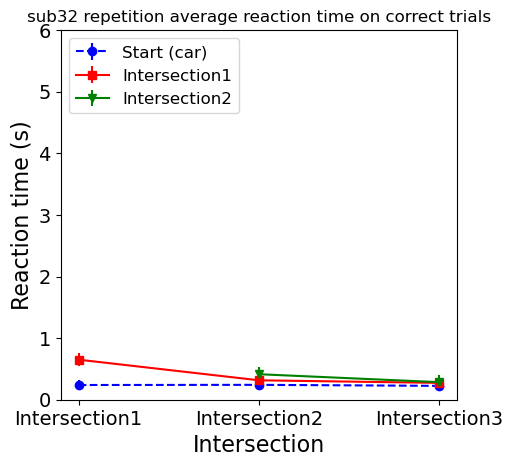

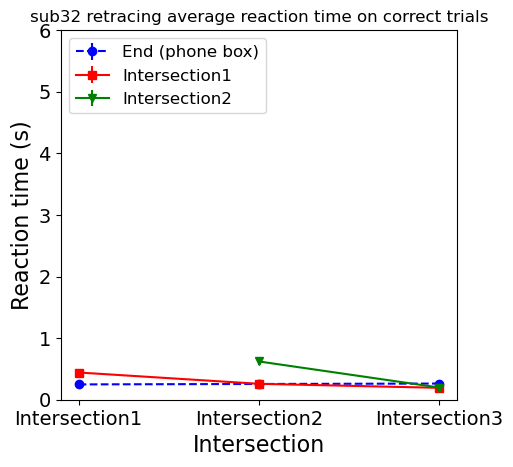

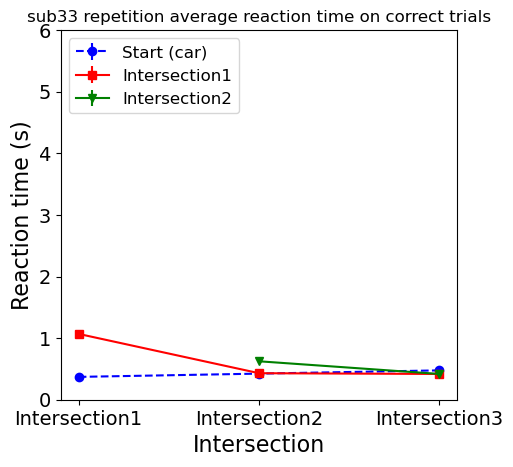

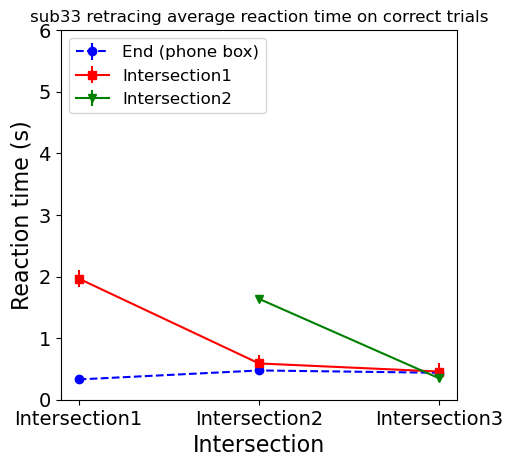

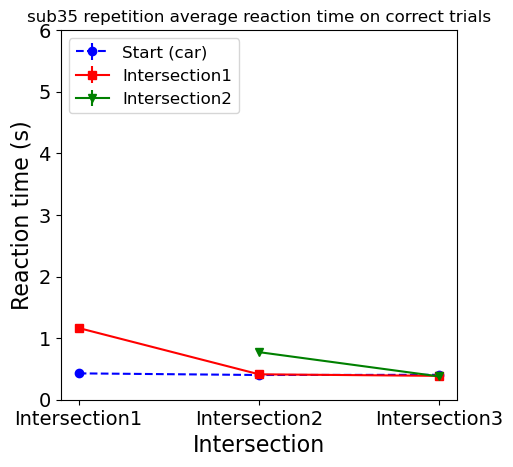

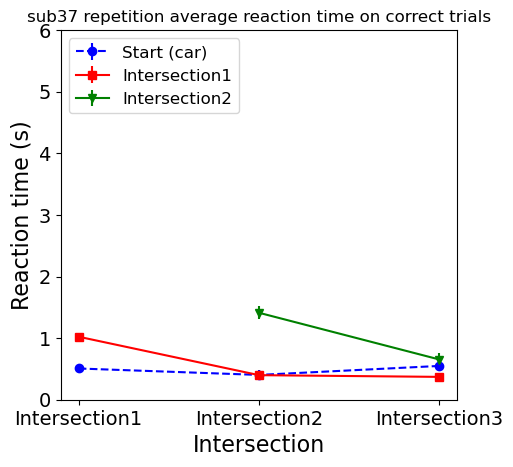

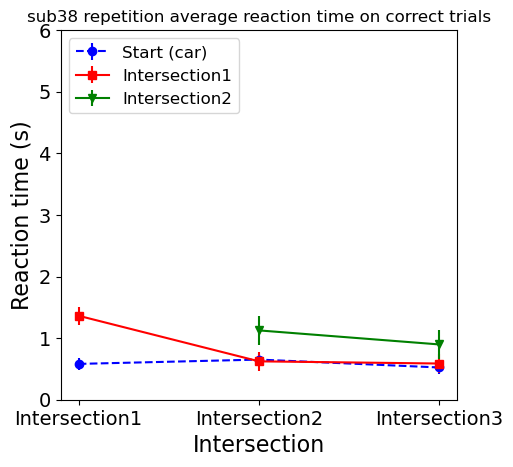

c:\Users\songj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\songj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


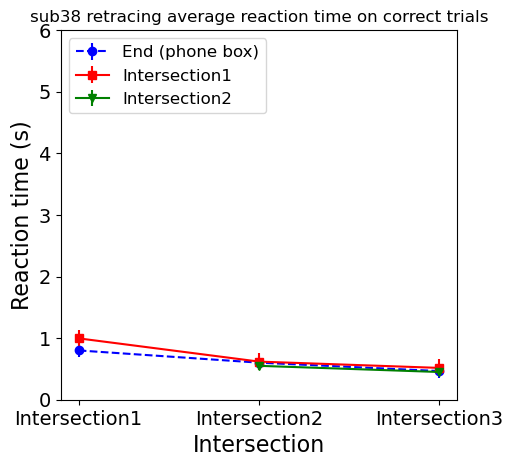

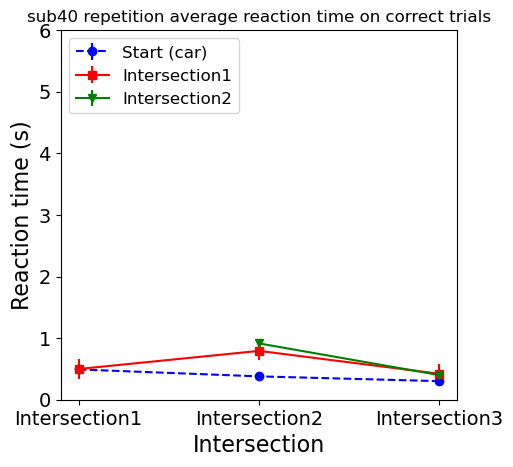

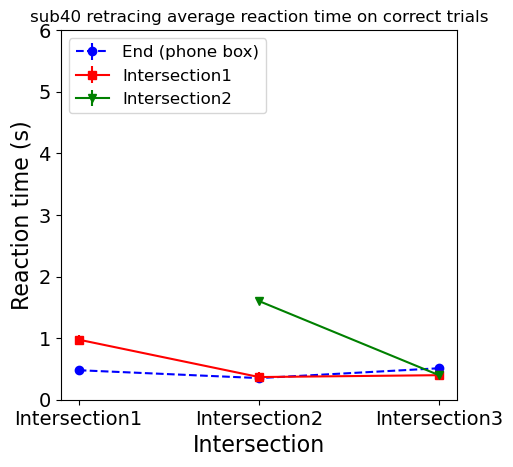

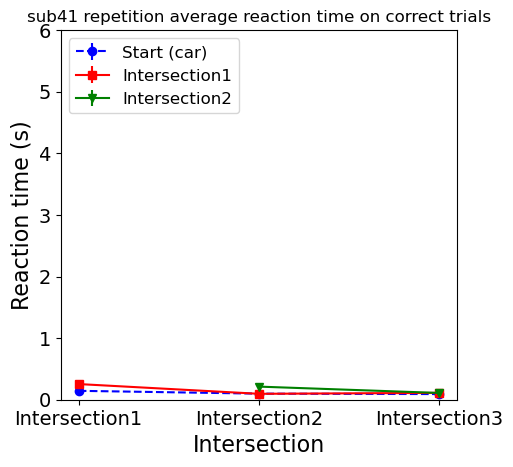

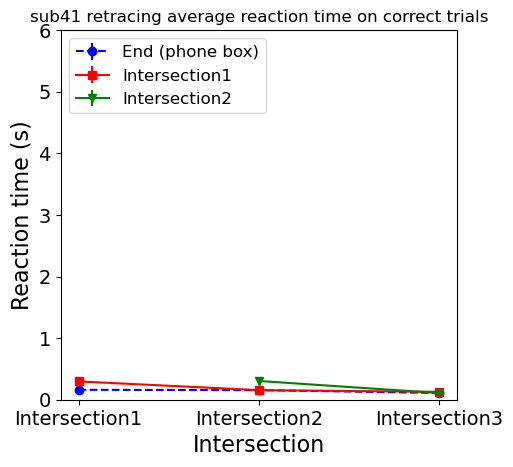

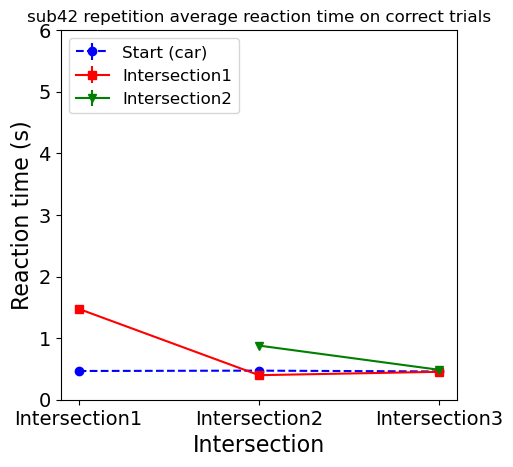

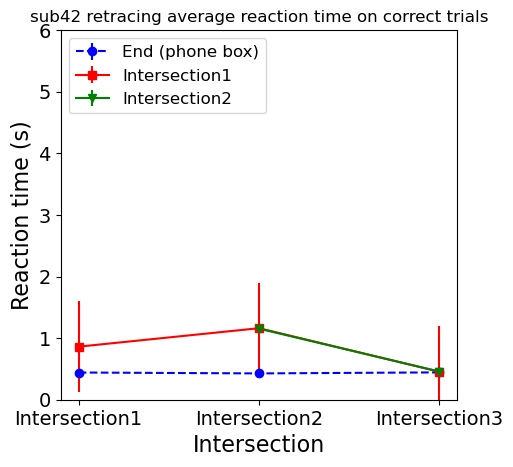

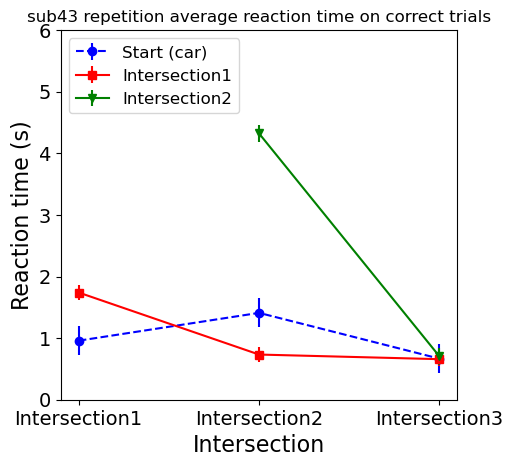

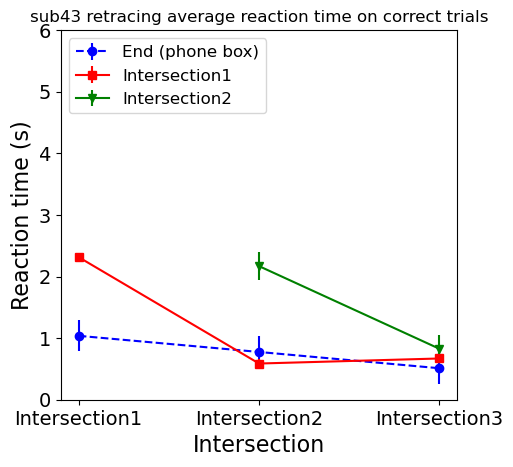

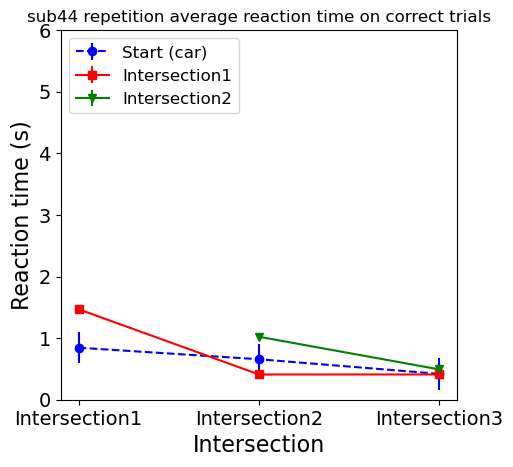

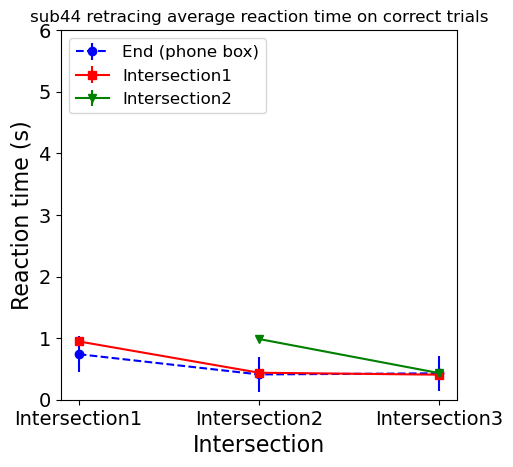

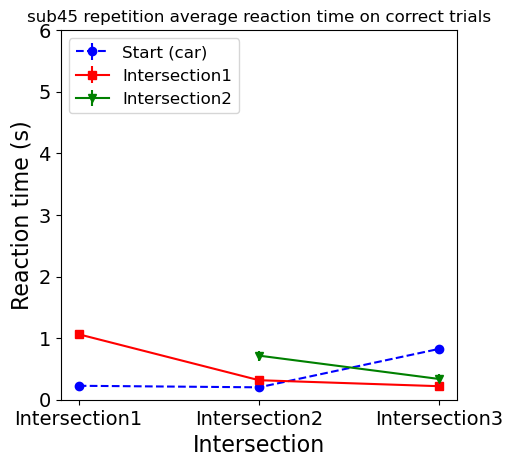

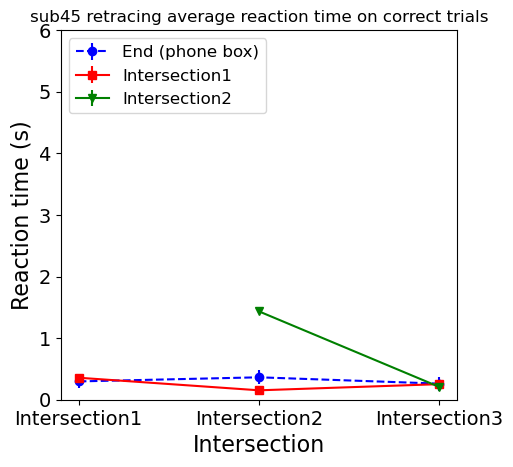

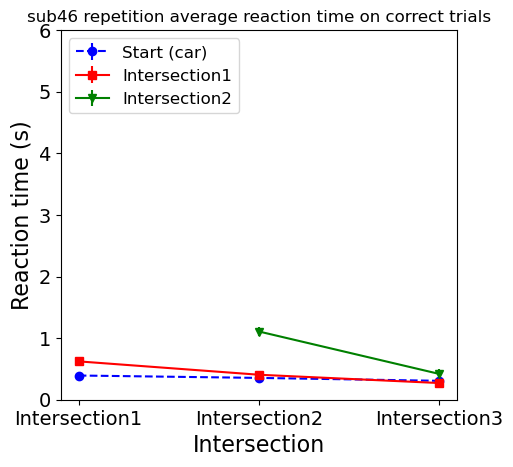

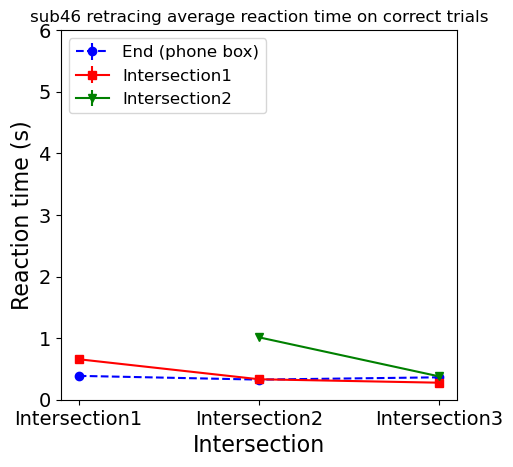

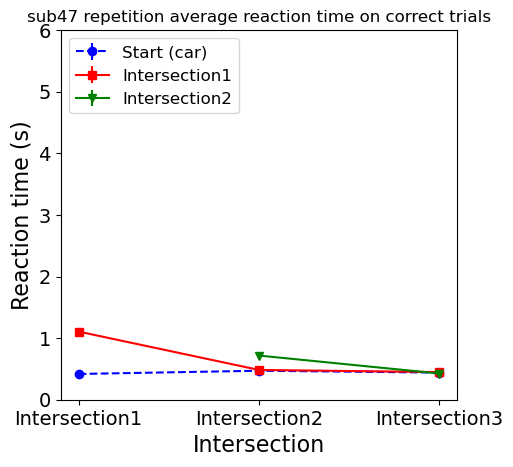

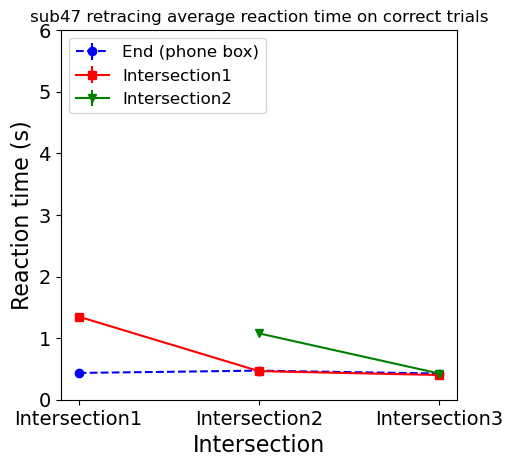

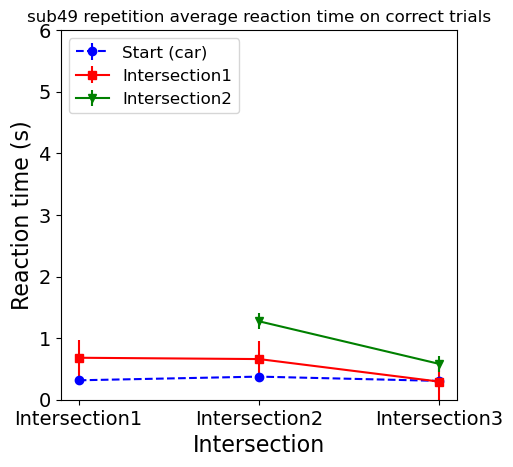

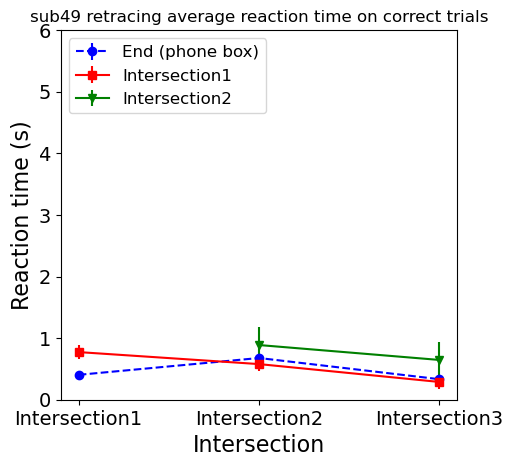

Combined data for all subjects has been saved to: S:/GSani/JieSong/1.Data/raw_data\figures\aver_rt_acc\all_subjects_aver_rt.csv


In [42]:
# Step03: plot the merged behavior data for repetition and retracing for all subjects
# Save the plots to the "figures" folder
# only plot the correct trials
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
base_dir = 'S:/GSani/JieSong/1.Data/raw_data'
figure_path = os.path.join(base_dir, 'figures')
aver_path = os.path.join(base_dir, 'figures', 'aver_rt_acc')

# Iterate over each subject directory
for subject_dir in os.listdir(base_dir):
    if not subject_dir.startswith('sub'):
        continue
    input_dir = os.path.join(base_dir, subject_dir, 'condition_behavior')
    out_dir = os.path.join(base_dir, subject_dir, 'merged_behavior')
    
    if not os.path.exists(figure_path):
        os.makedirs(figure_path)
        
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
        
    csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]
    #### Plot all sujects behavior data for repetition and retracing
    # csv_files = [file for file in os.listdir(out_dir) if file.endswith('aver_rt.csv')]
    repe_data = pd.DataFrame()
    retra_data = pd.DataFrame()

    for csv_file in csv_files:
        csv_path = os.path.join(input_dir, csv_file)
        data = pd.read_csv(csv_path)
        if len(data.columns) == 1:
            data = pd.read_csv(csv_path, sep=';')
        data.columns = data.columns.str.strip()

        # Check if 'accuracy' column exists
        if 'accuracy' in data.columns:
            # Check if all accuracy values are 1
            if (data['accuracy'] == 1).all():
                num_remaining_blocks = data['block'].nunique()
            else:
                blocks_with_zero_accuracy = data[data['accuracy'] == 0]['block'].unique()
                data = data[~data['block'].isin(blocks_with_zero_accuracy)]
                num_remaining_blocks = data['block'].nunique()
        else:
            print("Accuracy column not found in the DataFrame.")
        
        # Write the number of remaining blocks to a text file
        txt_file_path = os.path.join(out_dir, f'{os.path.splitext(csv_file)[0]}_remaining_blocks.txt')
        with open(txt_file_path, 'w') as txt_file:
            txt_file.write(f"Remaining Blocks: {num_remaining_blocks}")

        # Group the data for further processing
        grouped_data = data.groupby(['Intersection', 'Condition'])['rt'].mean()
        sem_data = data.groupby(['Intersection', 'Condition'])['rt'].sem()

        rt_data = pd.DataFrame()
        rt_data['Intersection'] = grouped_data.index.get_level_values(0)
        rt_data['Condition'] = grouped_data.index.get_level_values(1)
        rt_data['rt'] = grouped_data.values

        #save the average reaction time of each run to a new csv file
        # output_file = os.path.join(aver_path, f'{os.path.splitext(csv_file)[0]}_aver_rt.csv')
        # rt_data.to_csv(output_file, index=False)
        # save the average reaction time for each subject to a new csv file


        if 'Repetition' in csv_file:
            combined_repe_data = pd.concat([repe_data, rt_data], ignore_index=True)
            repe_data = combined_repe_data
        elif 'Retracing' in csv_file:
            combined_retra_data = pd.concat([retra_data, rt_data], ignore_index=True)
            retra_data = combined_retra_data

    combined_repe_file = os.path.join(out_dir, f'{subject_dir}_repetition_combined_aver_rt.csv')
    combined_retra_file = os.path.join(out_dir, f'{subject_dir}_retracing_combined_aver_rt.csv')
    repe_data.to_csv(combined_repe_file, index=False)
    retra_data.to_csv(combined_retra_file, index=False)

    combined_repe = pd.read_csv(combined_repe_file)
    grouped_data = combined_repe.groupby(['Intersection', 'Condition'])['rt'].mean()
    sem_data = combined_repe.groupby(['Intersection', 'Condition'])['rt'].sem()
    fig, ax2 = plt.subplots()
    repe_Car_data = grouped_data.loc(axis=0)[:, 'Car']
    repe_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
    repe_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
    plt.errorbar(repe_Car_data.index.get_level_values(0), repe_Car_data.values,
                yerr=sem_data.loc[('Intersection1', 'Car')], 
                marker='o', label='Start (car)', color='blue', linestyle='--')
    plt.errorbar(repe_C2_data.index.get_level_values(0), repe_C2_data.values,
                yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
                marker='s', label='Intersection1', color='red', linestyle='-')
    plt.errorbar(repe_C3_data.index.get_level_values(0), repe_C3_data.values,
                yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
                marker='v', label='Intersection2', color='green', linestyle='-')

    plt.xlabel('Intersection', fontsize=16)
    plt.ylabel('Reaction time (s)', fontsize=16)
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.ylim(0, 6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.title(f'{subject_dir} repetition average reaction time on correct trials')
    figure_dir = os.path.join(figure_path, f'{subject_dir}_repetition_combined_aver_rt.png')
    plt.savefig(figure_dir, transparent=True)
    plt.show()

    combined_retra = pd.read_csv(combined_retra_file)
    grouped_data = combined_retra.groupby(['Intersection', 'Condition'])['rt'].mean()
    sem_data = combined_retra.groupby(['Intersection', 'Condition'])['rt'].sem()

    fig, ax2 = plt.subplots()
    retra_Car_data = grouped_data.loc(axis=0)[:, 'PhoneBox']
    retra_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
    retra_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
    plt.errorbar(retra_Car_data.index.get_level_values(0), retra_Car_data.values,
                yerr=sem_data.loc[('Intersection1', 'PhoneBox')], 
                marker='o', label='End (phone box)', color='blue', linestyle='--')
    plt.errorbar(retra_C2_data.index.get_level_values(0), retra_C2_data.values,
                yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
                marker='s', label='Intersection1', color='red', linestyle='-')
    plt.errorbar(retra_C3_data.index.get_level_values(0), retra_C3_data.values,
                yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
                marker='v', label='Intersection2', color='green', linestyle='-')
    plt.xlabel('Intersection', fontsize=16)
    plt.ylabel('Reaction time (s)', fontsize=16)
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.ylim(0, 6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.title(f'{subject_dir} retracing average reaction time on correct trials')
    figure_dir = os.path.join(figure_path, f'{subject_dir}_retracing_combined_aver_rt.png')
    plt.savefig(figure_dir, transparent=True)
    plt.show()

# Save the subject_ID, repetition and retracing average reaction time for all conditions and intersections (data point from our plots) to two new csv files for repetition and retracing
# Save to the "aver_rt_acc" folder
# Create an empty DataFrame to hold combined data from all subjects
all_subjects_data = pd.DataFrame()

# Iterate over each subject directory and process their combined data
for subject_dir in os.listdir(base_dir):
    if not subject_dir.startswith('sub'):
        continue  # Skip non-subject directories
    repe_file = os.path.join(aver_path, f'{subject_dir}_repetition_combined_aver_rt.csv')
    retra_file = os.path.join(aver_path, f'{subject_dir}_retracing_combined_aver_rt.csv')
    # Read the repetition and retracing data for the subject
    repe_data = pd.read_csv(repe_file)
    retra_data = pd.read_csv(retra_file)
    # Merge the two data sets (repetition and retracing)
    merged_data = pd.merge(repe_data, retra_data, on=['Intersection', 'Condition'], 
                           suffixes=('_repe', '_retra'),
                           how='outer')
    # Add the subject ID column to the merged data
    merged_data['subject_ID'] = subject_dir
    # Pivot the merged data to get each intersection-condition as a column (for both repetition and retracing)
    pivoted_data = merged_data.pivot_table(index='subject_ID', 
                                          columns=['Condition', 'Intersection'], 
                                          values=['rt_repe', 'rt_retra'], 
                                          aggfunc='mean',
                                          fill_value=np.nan)
    # Flatten the multi-level columns and reset index to make it more accessible
    pivoted_data.columns = [f'{condition}_{intersection}_{stat}' for condition, intersection, stat in pivoted_data.columns]
    pivoted_data.reset_index(inplace=True)
    # Concatenate this subject's data to the all_subjects_data DataFrame
    all_subjects_data = pd.concat([all_subjects_data, pivoted_data], ignore_index=True)
# Save the combined data for all subjects to a new CSV
combined_all_subjects_file = os.path.join(aver_path, 'all_subjects_aver_rt.csv')
all_subjects_data.to_csv(combined_all_subjects_file, index=False)

print(f"Combined data for all subjects has been saved to: {combined_all_subjects_file}")



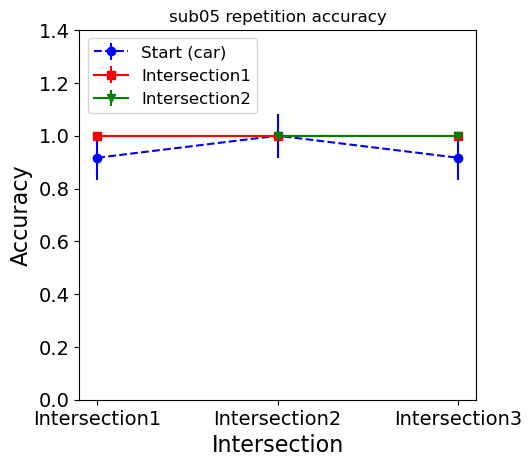

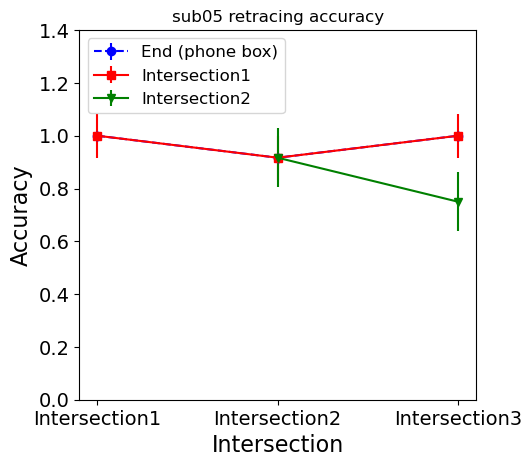

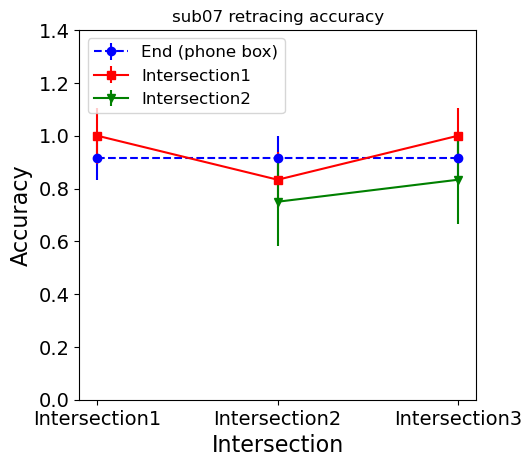

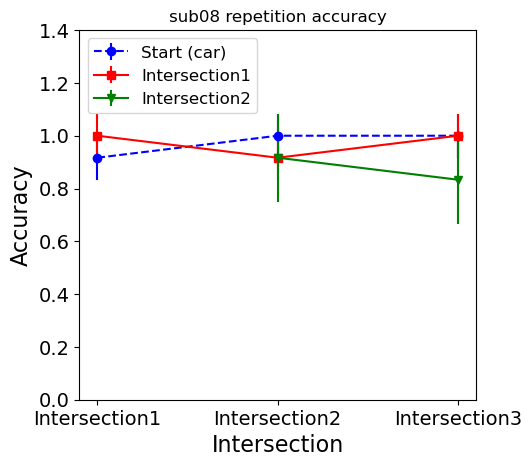

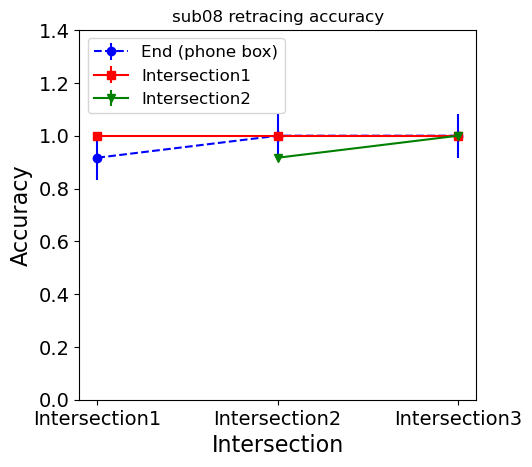

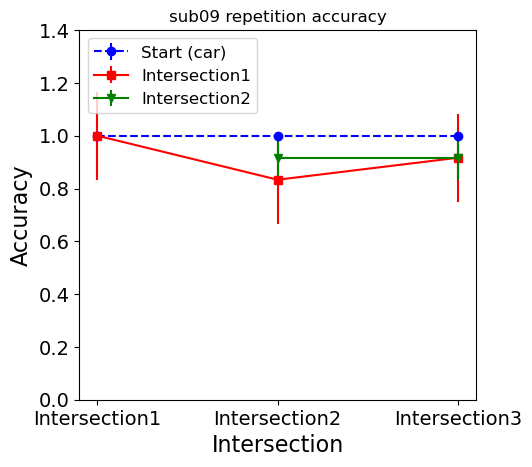

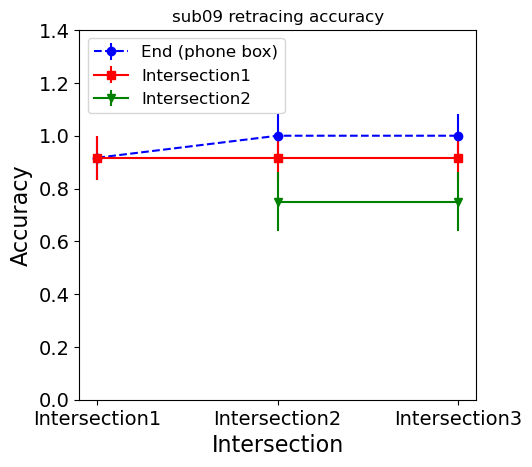

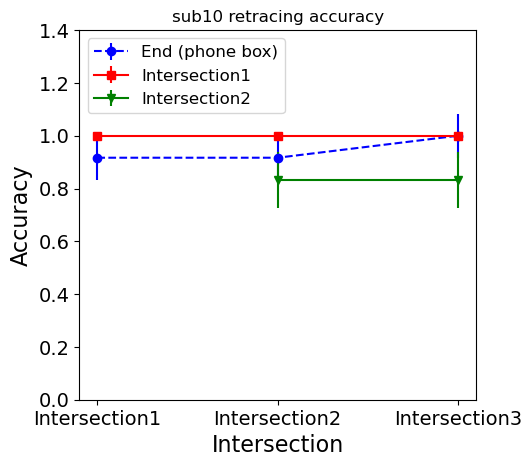

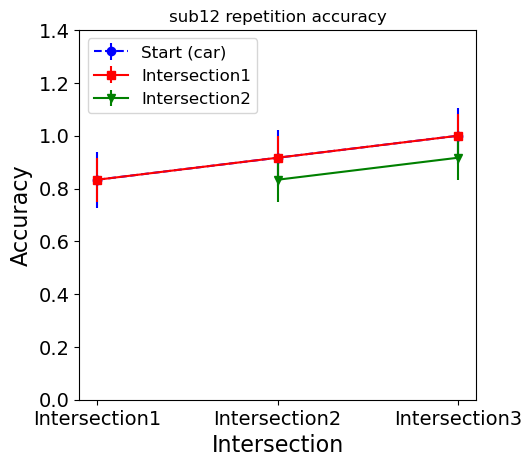

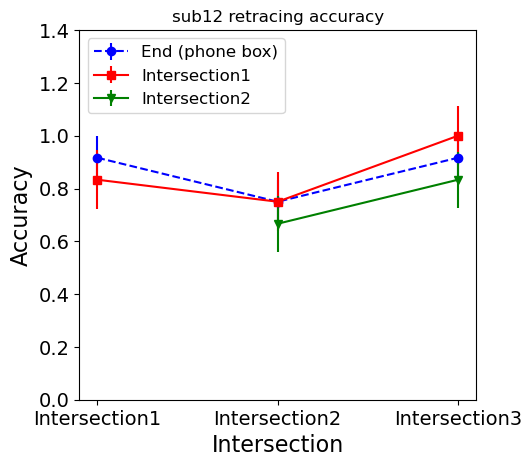

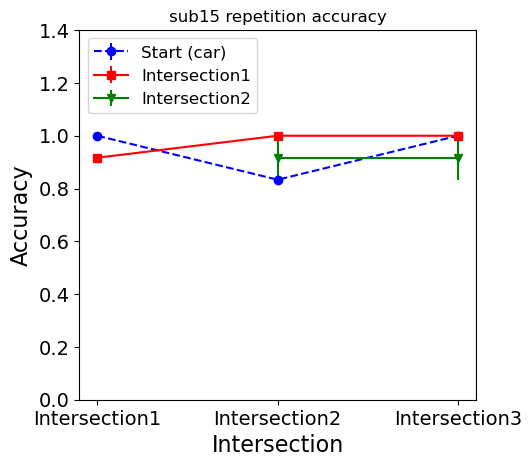

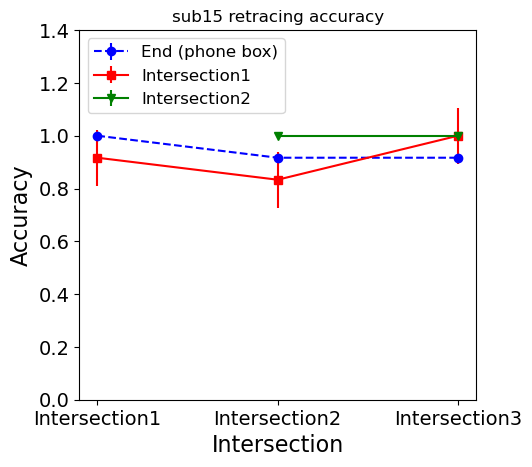

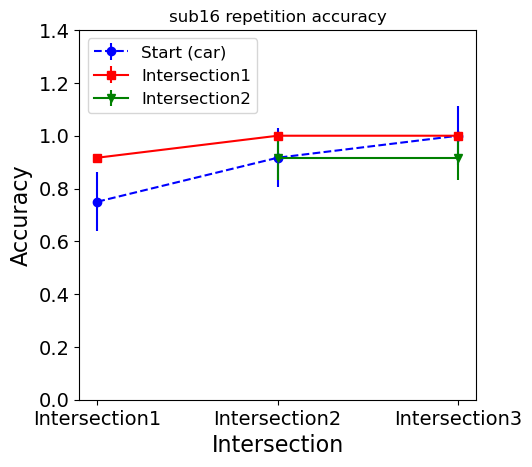

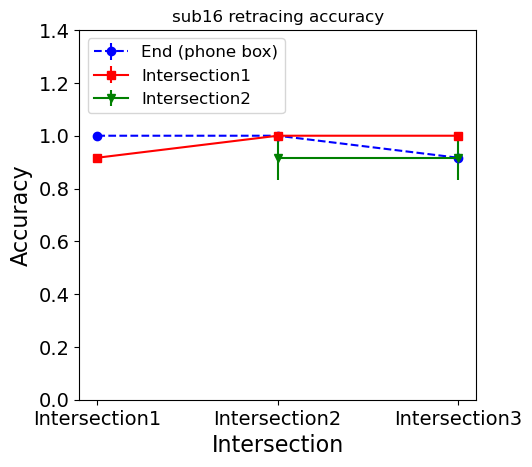

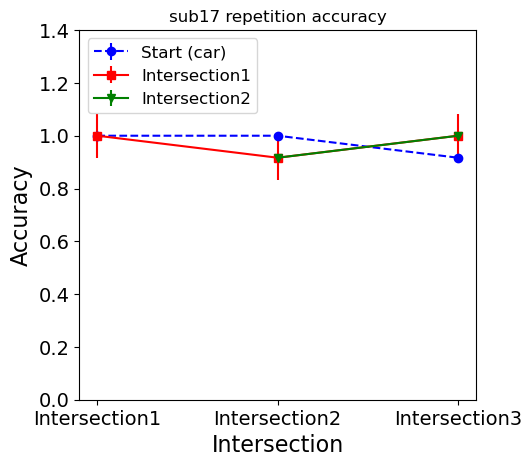

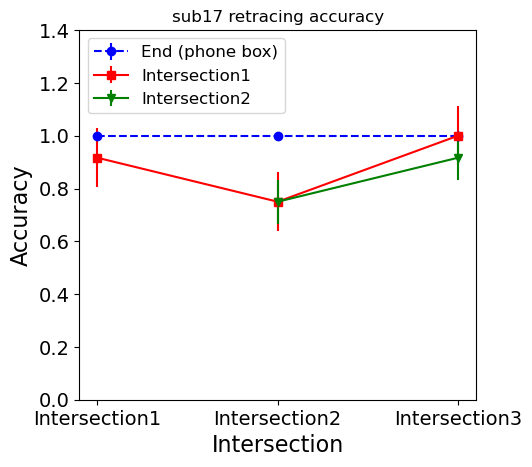

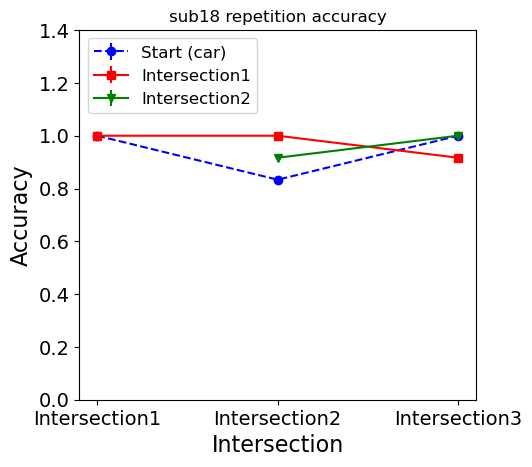

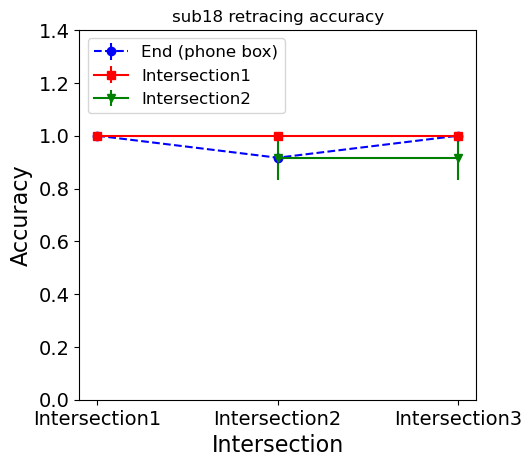

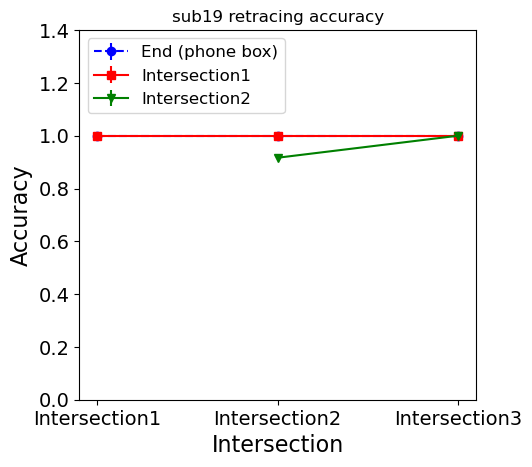

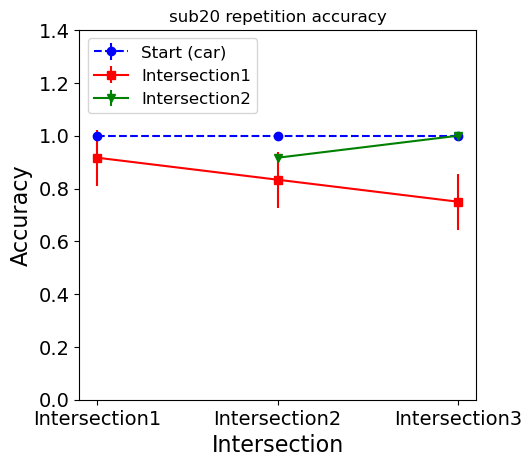

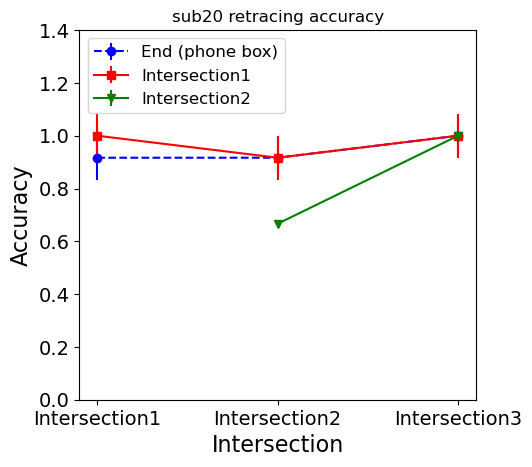

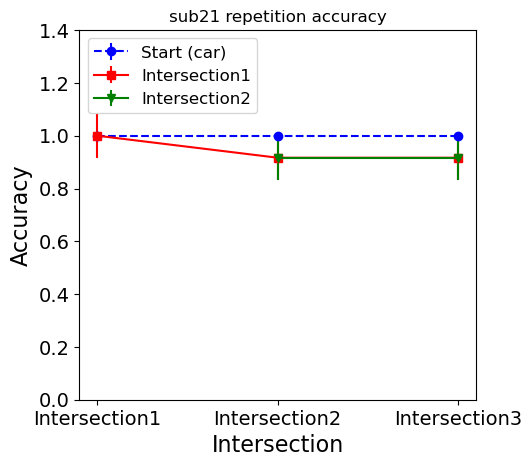

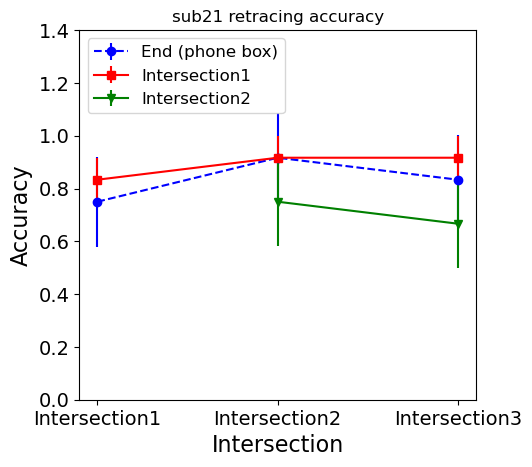

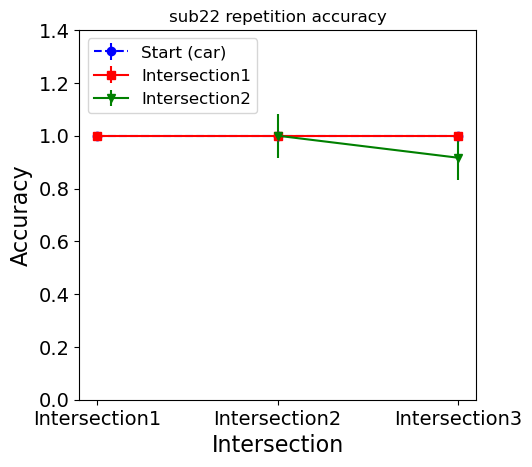

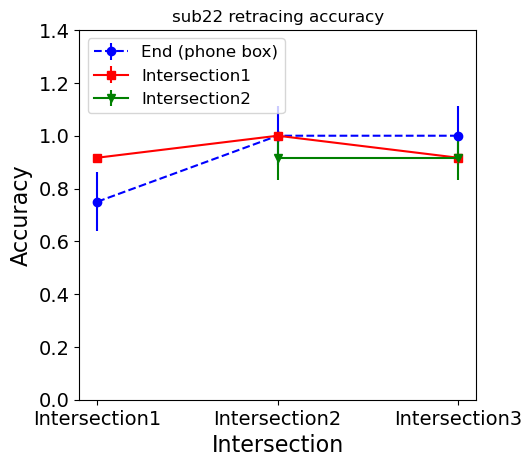

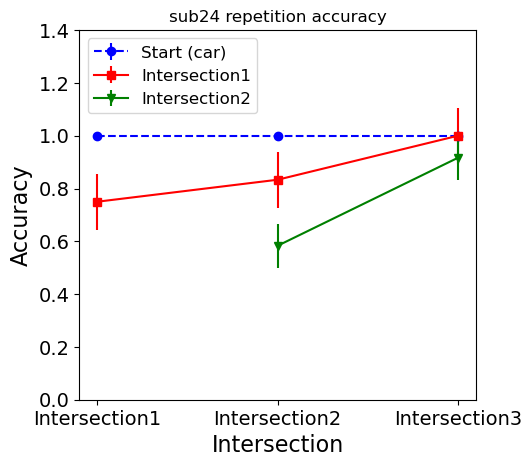

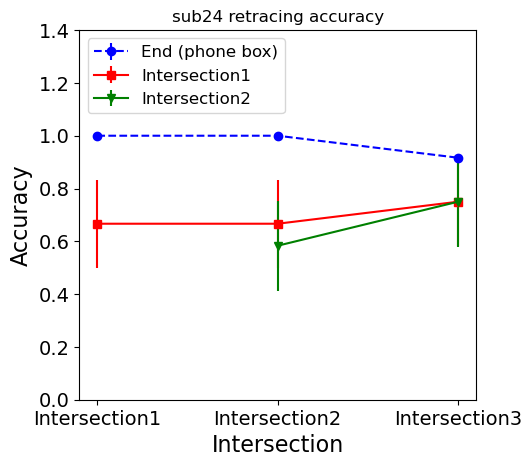

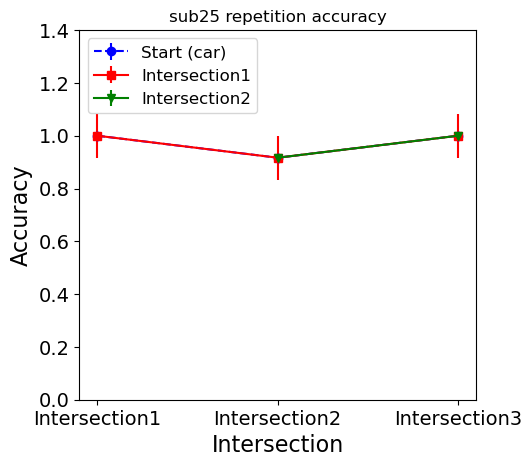

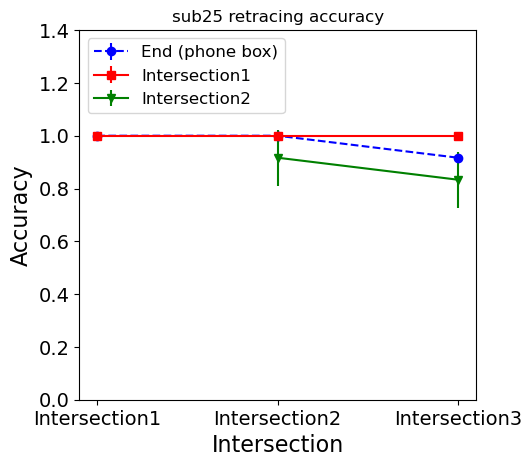

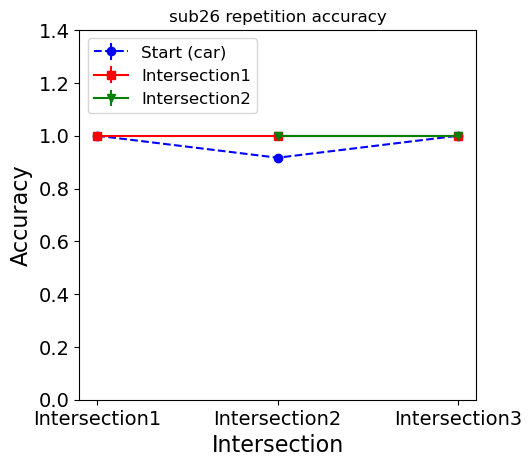

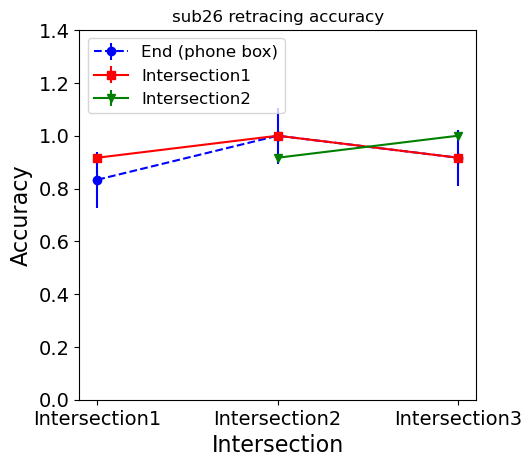

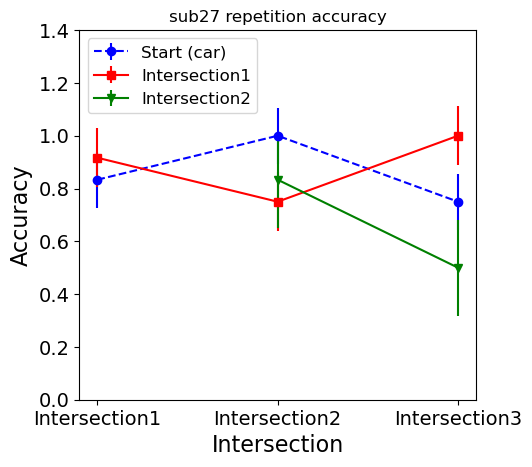

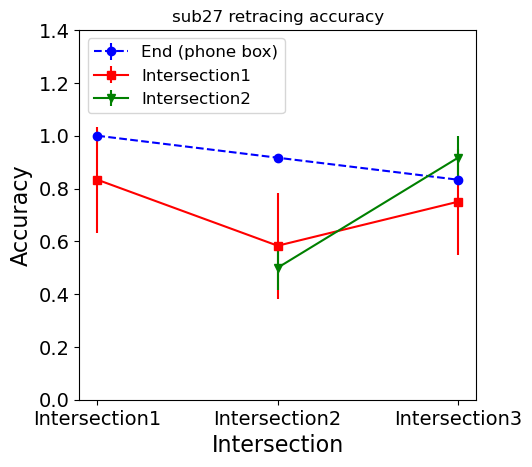

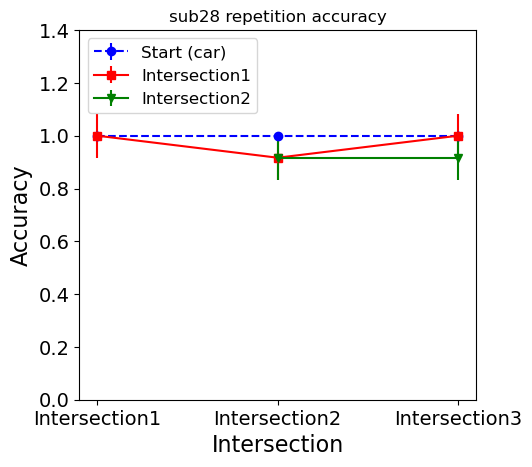

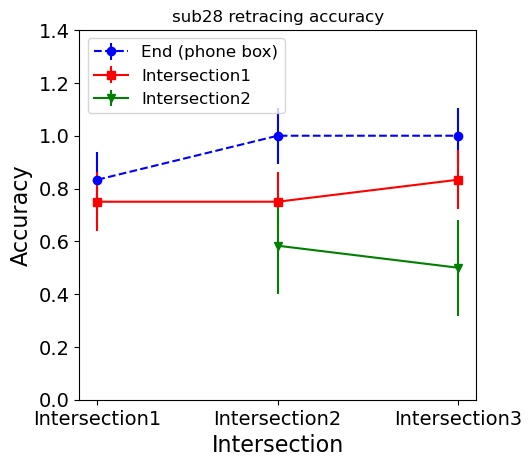

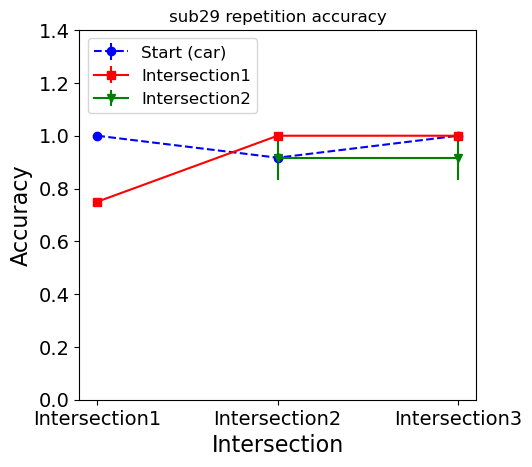

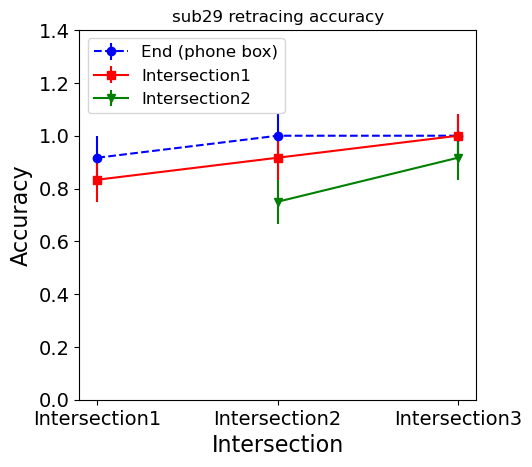

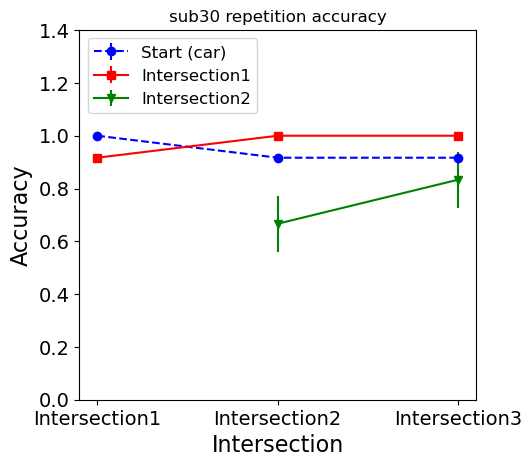

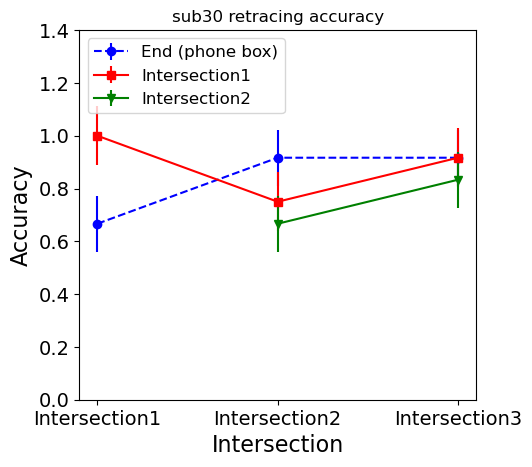

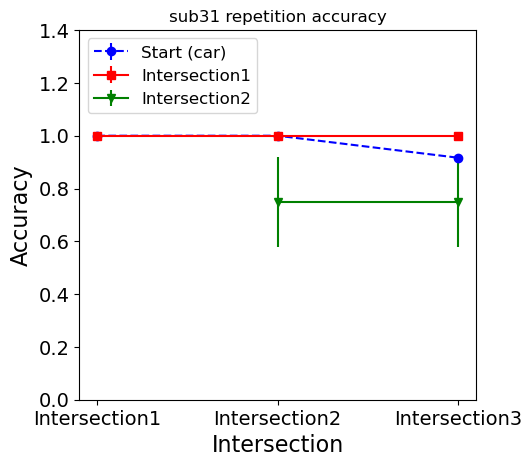

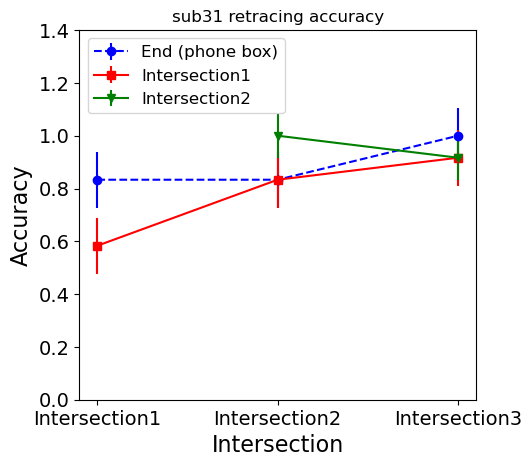

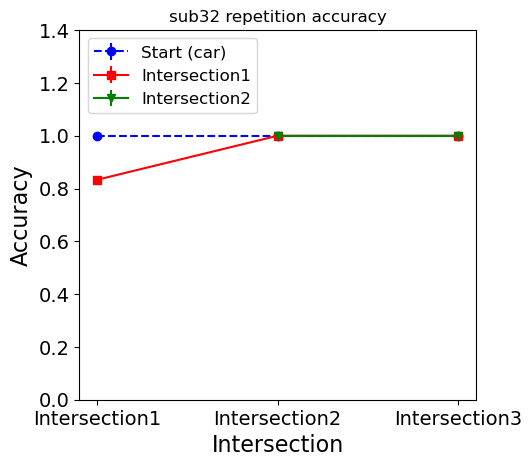

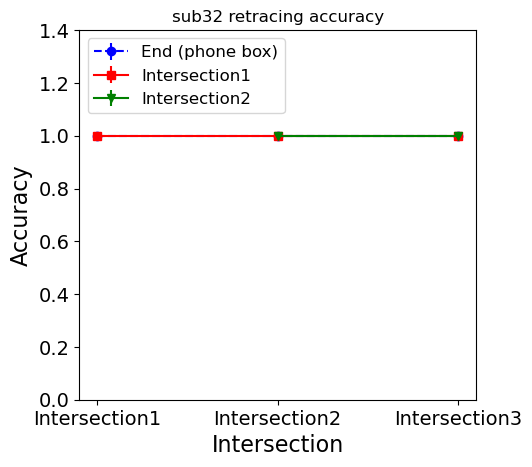

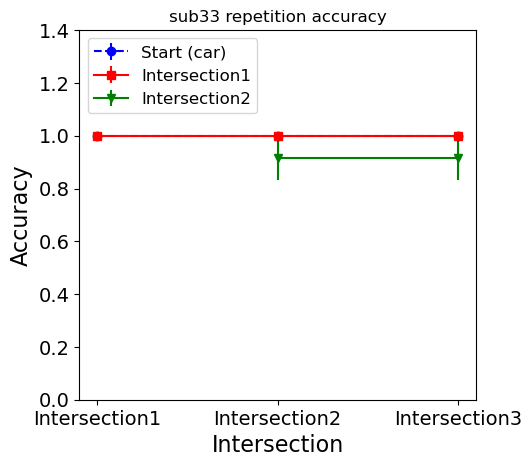

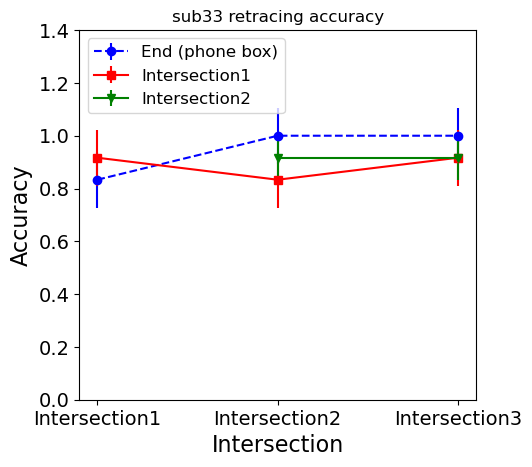

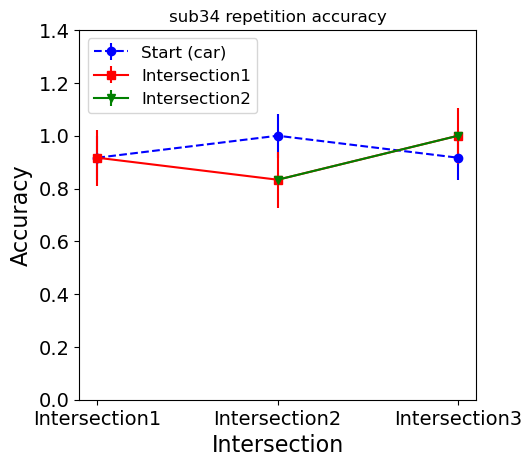

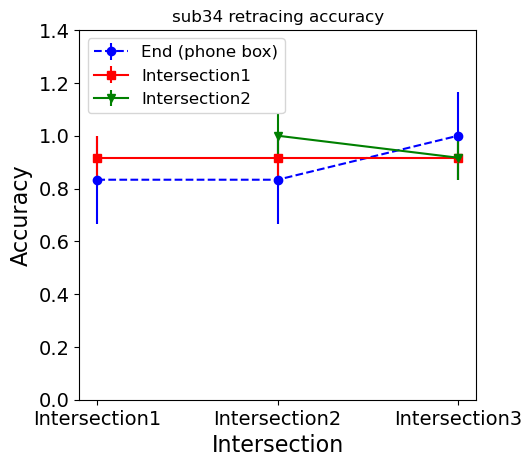

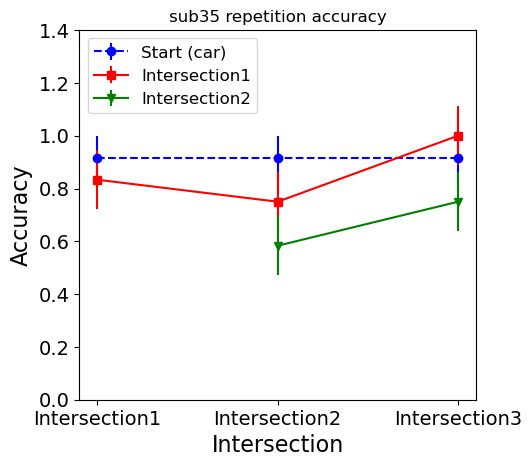

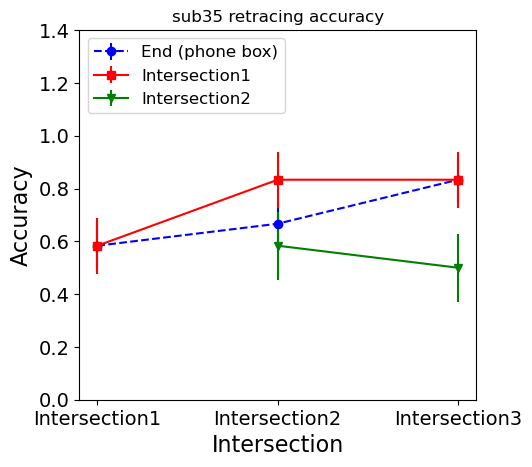

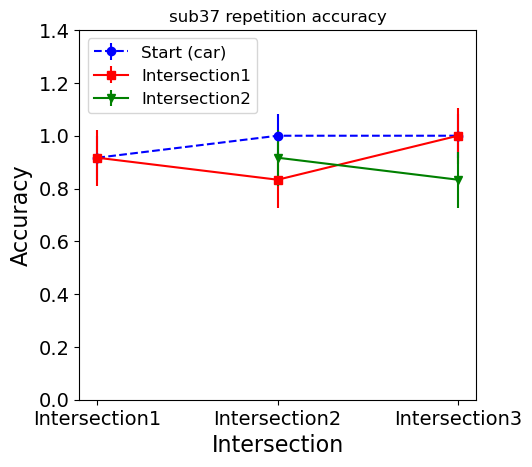

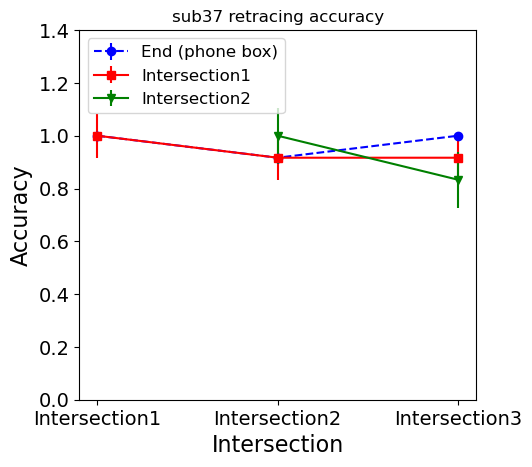

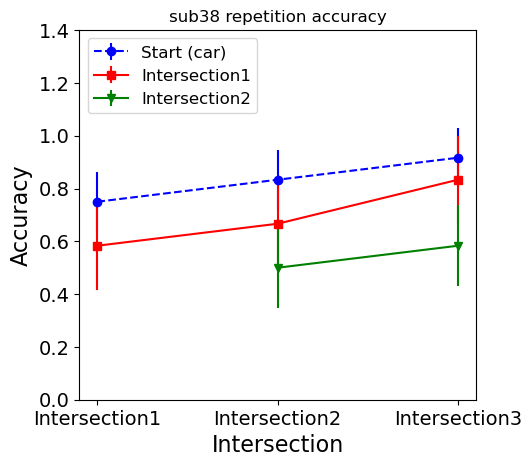

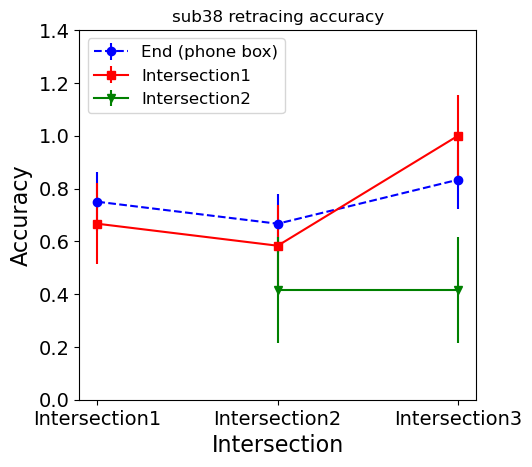

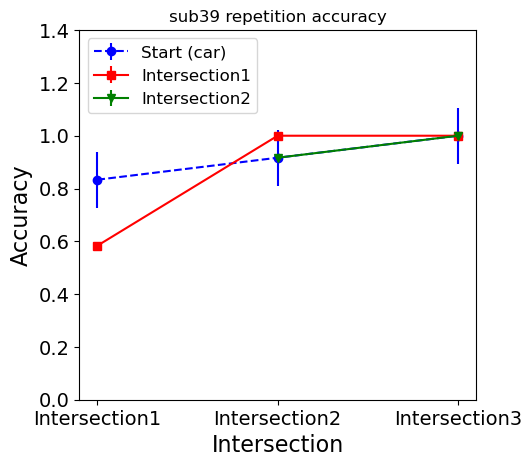

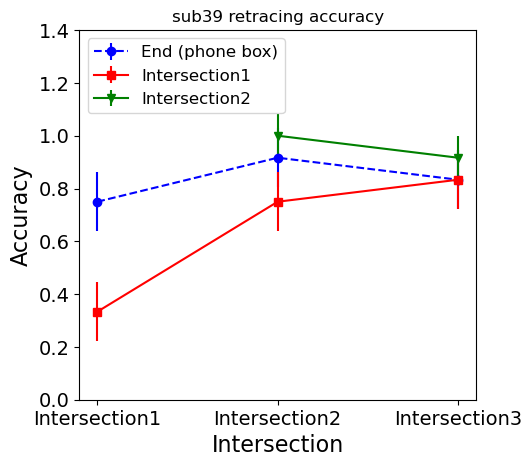

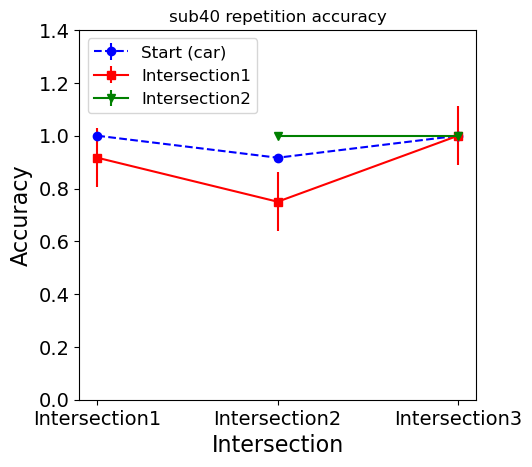

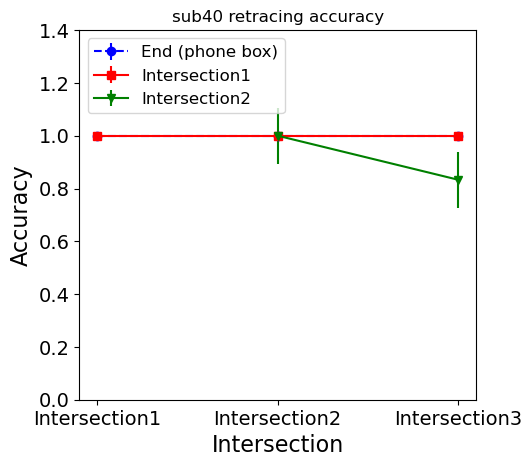

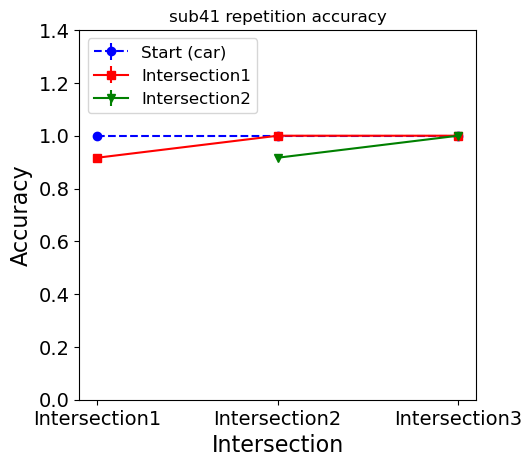

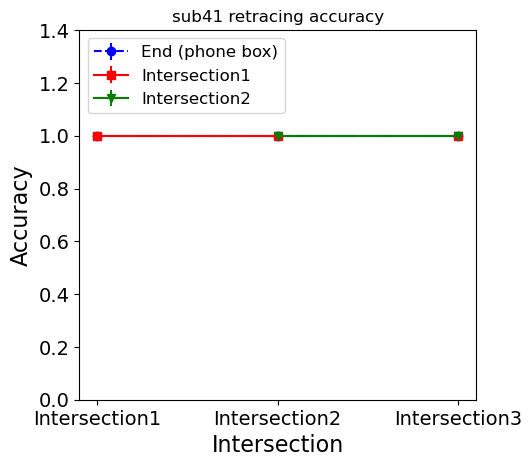

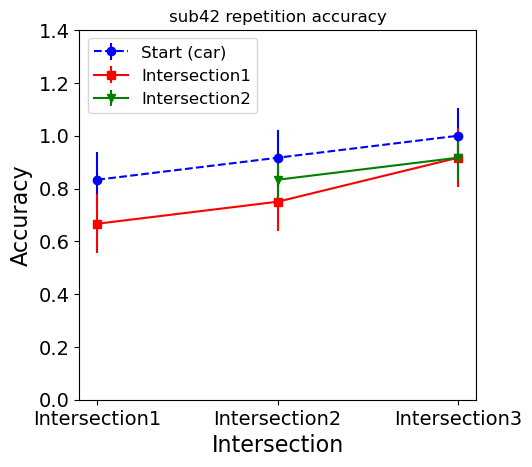

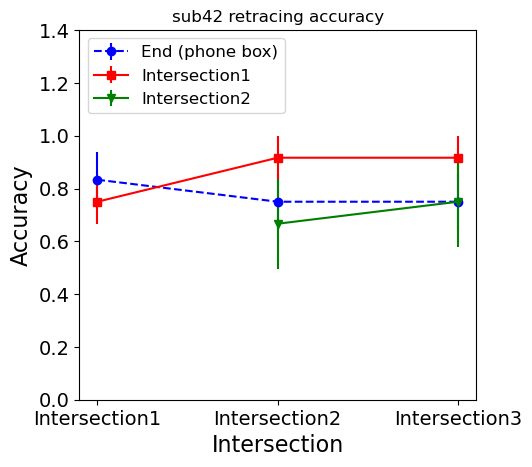

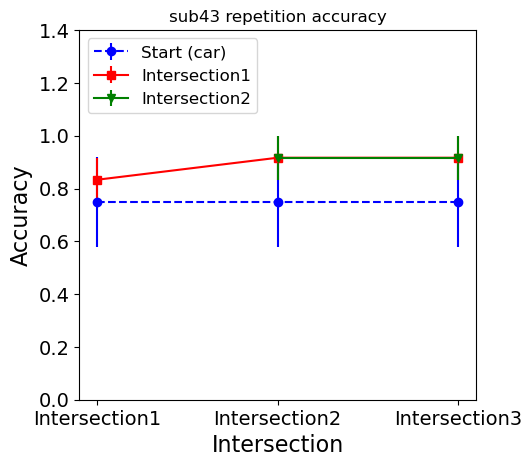

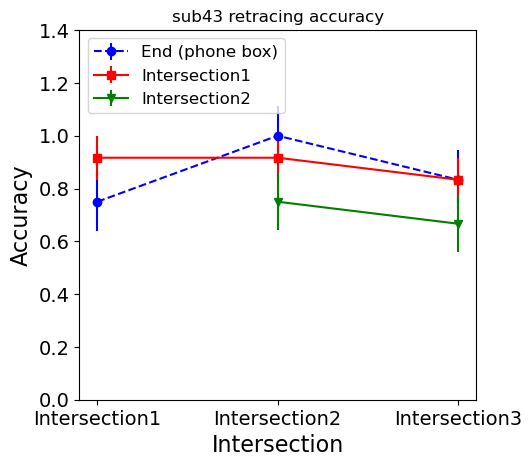

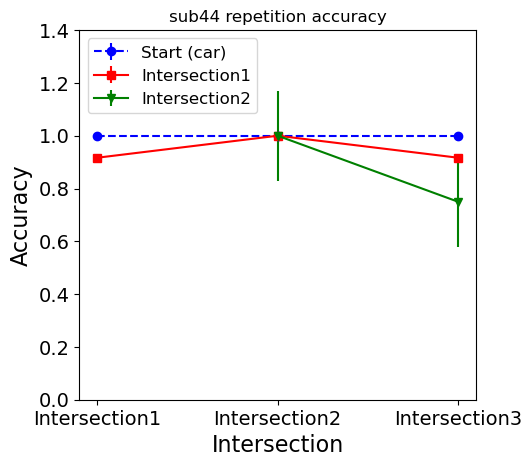

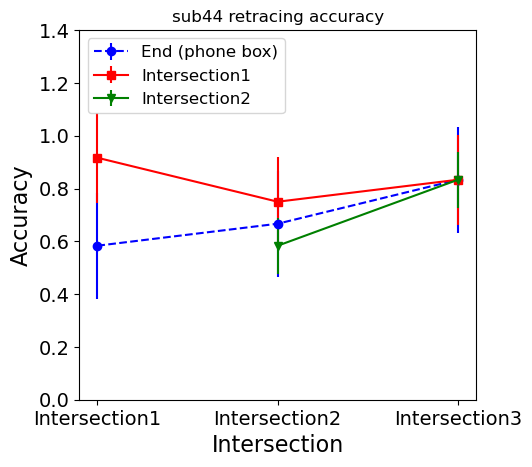

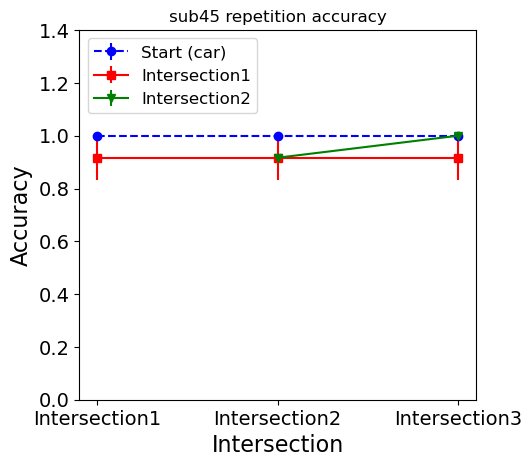

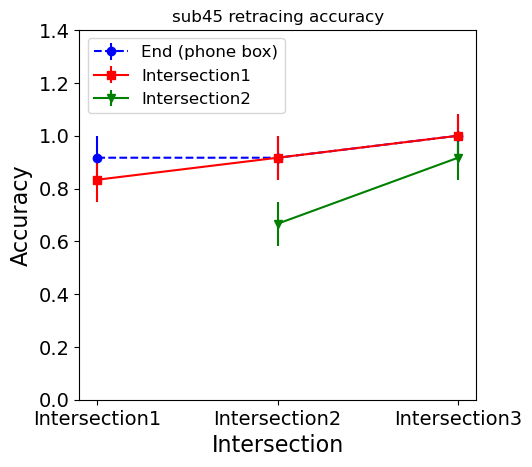

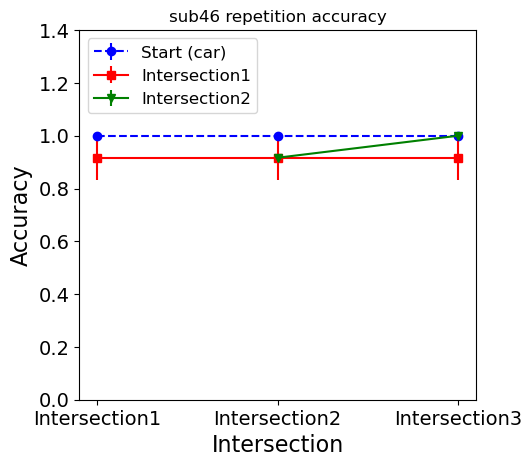

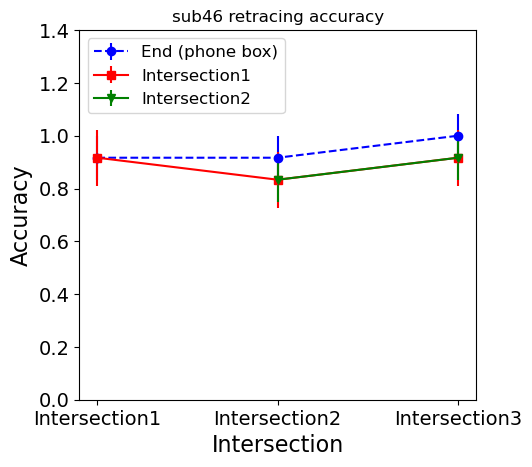

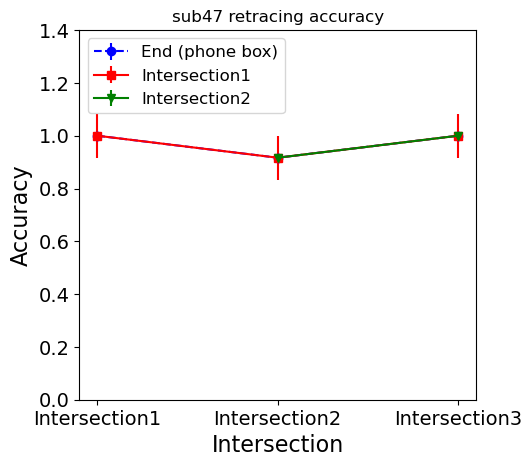

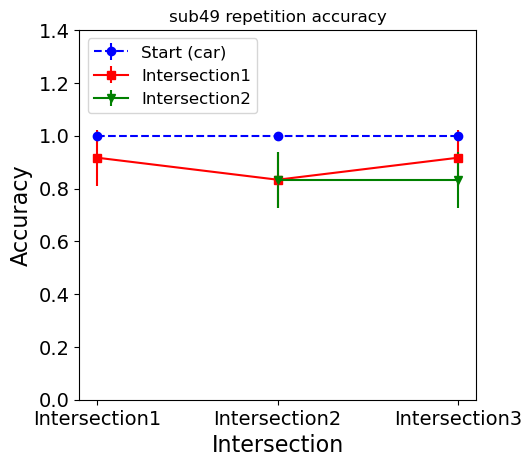

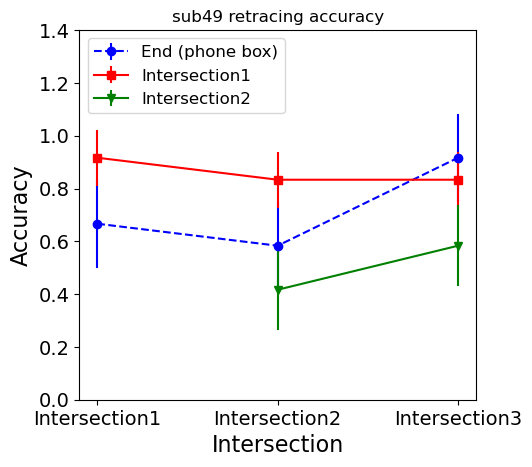

In [41]:
# plot the accuracy ACC data for the repetition and retracing
import os
import matplotlib.pyplot as plt
import pandas as pd

base_dir = 'S:/GSani/JieSong/1.Data/raw_data'
figure_path = os.path.join(base_dir, 'figures')
aver_path = os.path.join(base_dir, 'figures', 'aver_rt_acc')

# Iterate over each subject directory
for subject_dir in os.listdir(base_dir):
    if not subject_dir.startswith('sub'):
        continue
    input_dir = os.path.join(base_dir, subject_dir, 'condition_behavior')
    out_dir = os.path.join(base_dir, subject_dir, 'merged_behavior')
    if not os.path.exists(figure_path):
        os.makedirs(figure_path)   
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
        
    csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]
    repe_data = pd.DataFrame()
    retra_data = pd.DataFrame()

    for csv_file in csv_files:
        csv_path = os.path.join(input_dir, csv_file)
        data = pd.read_csv(csv_path)
        if len(data.columns) == 1:
            data = pd.read_csv(csv_path, sep=';')
        data.columns = data.columns.str.strip()
        grouped_data = data.groupby(['Intersection', 'Condition'])['accuracy'].mean()
        sem_data = data.groupby(['Intersection', 'Condition'])['accuracy'].sem()
        acc_data = pd.DataFrame()
        acc_data['Intersection'] = grouped_data.index.get_level_values(0)
        acc_data['Condition'] = grouped_data.index.get_level_values(1)
        acc_data['accuracy'] = grouped_data.values
        # save the average accuracy of each run to a new csv file
        # output_file = os.path.join(aver_path, f'{os.path.splitext(csv_file)[0]}_aver_acc.csv')
        # acc_data.to_csv(output_file, index=False)
        if 'Repetition' in csv_file:
            combined_repe_data = pd.concat([repe_data, acc_data], ignore_index=True)
            repe_data = combined_repe_data
        elif 'Retracing' in csv_file:
            combined_retra_data = pd.concat([retra_data, acc_data], ignore_index=True)
            retra_data = combined_retra_data

    combined_repe_file = os.path.join(out_dir, f'{subject_dir}_repetition_combined_aver_acc.csv')
    combined_retra_file = os.path.join(out_dir, f'{subject_dir}_retracing_combined_aver_acc.csv')
    repe_data.to_csv(combined_repe_file, index=False)
    retra_data.to_csv(combined_retra_file, index=False)

    combined_repe = pd.read_csv(combined_repe_file)
    grouped_data = combined_repe.groupby(['Intersection', 'Condition'])['accuracy'].mean()
    sem_data = combined_repe.groupby(['Intersection', 'Condition'])['accuracy'].sem()
    fig, ax2 = plt.subplots()
    repe_Car_data = grouped_data.loc(axis=0)[:, 'Car']
    repe_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
    repe_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
    plt.errorbar(repe_Car_data.index.get_level_values(0), repe_Car_data.values,
                yerr=sem_data.loc[('Intersection1', 'Car')], 
                marker='o', label='Start (car)', color='blue', linestyle='--')
    plt.errorbar(repe_C2_data.index.get_level_values(0), repe_C2_data.values,
                yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
                marker='s', label='Intersection1', color='red', linestyle='-')
    plt.errorbar(repe_C3_data.index.get_level_values(0), repe_C3_data.values,
                yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
                marker='v', label='Intersection2', color='green', linestyle='-')
    
    plt.xlabel('Intersection', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.ylim(0, 1.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.title(f'{subject_dir} repetition accuracy')
    figure_dir = os.path.join(figure_path, f'{subject_dir}_repetition_combined_aver_acc.png')
    plt.savefig(figure_dir, transparent=True)
    plt.show()

    combined_retra = pd.read_csv(combined_retra_file)
    grouped_data = combined_retra.groupby(['Intersection', 'Condition'])['accuracy'].mean()
    sem_data = combined_retra.groupby(['Intersection', 'Condition'])['accuracy'].sem()
    fig, ax2 = plt.subplots()
    retra_Car_data = grouped_data.loc(axis=0)[:, 'PhoneBox']
    retra_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
    retra_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
    plt.errorbar(retra_Car_data.index.get_level_values(0), retra_Car_data.values,
                yerr=sem_data.loc[('Intersection1', 'PhoneBox')], 
                marker='o', label='End (phone box)', color='blue', linestyle='--')
    plt.errorbar(retra_C2_data.index.get_level_values(0), retra_C2_data.values,
                yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
                marker='s', label='Intersection1', color='red', linestyle='-')
    plt.errorbar(retra_C3_data.index.get_level_values(0), retra_C3_data.values,
                yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
                marker='v', label='Intersection2', color='green', linestyle='-')
    plt.xlabel('Intersection', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.ylim(0, 1.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.title(f'{subject_dir} retracing accuracy')
    figure_dir = os.path.join(figure_path, f'{subject_dir}_retracing_combined_aver_acc.png')
    plt.savefig(figure_dir, transparent=True)
    plt.show()

# Save the subject_ID, repetition and retracing average accuracy for all conditions and intersections (data point from our plots) to two new csv files for repetition and retracing
# Save to the "aver_rt_acc" folder
# Create an empty DataFrame to hold combined data from all subjects
all_subjects_data = pd.DataFrame()
# Iterate over each subject directory and process their combined data
for subject_dir in os.listdir(base_dir):

    if not subject_dir.startswith('sub'):
        continue  # Skip non-subject directories
    repe_file = os.path.join(aver_path, f'{subject_dir}_repetition_combined_aver_acc.csv')
    retra_file = os.path.join(aver_path, f'{subject_dir}_retracing_combined_aver_acc.csv')
    # Read the repetition and retracing data for the subject
    repe_data = pd.read_csv(repe_file)
    retra_data = pd.read_csv(retra_file)
    # Merge the two data sets (repetition and retracing)
    merged_data = pd.merge(repe_data, retra_data, on=['Intersection', 'Condition'], 
                           suffixes=('_repe', '_retra'),
                           how='outer')
    # Add the subject ID column to the merged data
    merged_data['subject_ID'] = subject_dir
    # Pivot the merged data to get each intersection-condition as a column (for both repetition and retracing)
    pivoted_data = merged_data.pivot_table(index='subject_ID', 
                                          columns=['Condition', 'Intersection'], 
                                          values=['accuracy_repe', 'accuracy_retra'], 
                                          aggfunc='mean',
                                          fill_value=np.nan)
    # Flatten the multi-level columns and reset index to make it more accessible
    pivoted_data.columns = [f'{condition}_{intersection}_{stat}' for condition, intersection, stat in pivoted_data.columns]
    pivoted_data.reset_index(inplace=True)
    # Concatenate this subject's data to the all_subjects_data DataFrame
    all_subjects_data = pd.concat([all_subjects_data, pivoted_data], ignore_index=True)
# Save the combined data for all subjects to a new CSV
combined_all_subjects_file = os.path.join(aver_path, 'all_subjects_aver_acc.csv')
all_subjects_data.to_csv(combined_all_subjects_file, index=False)


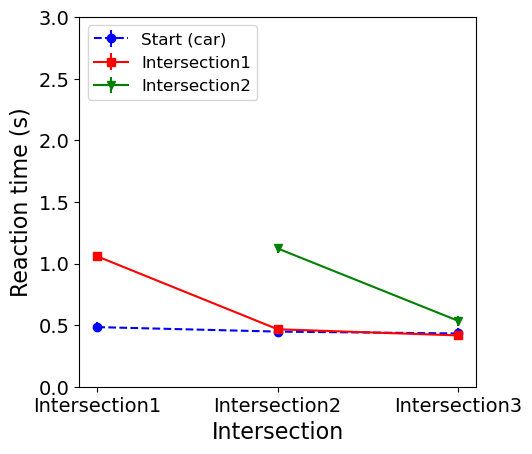

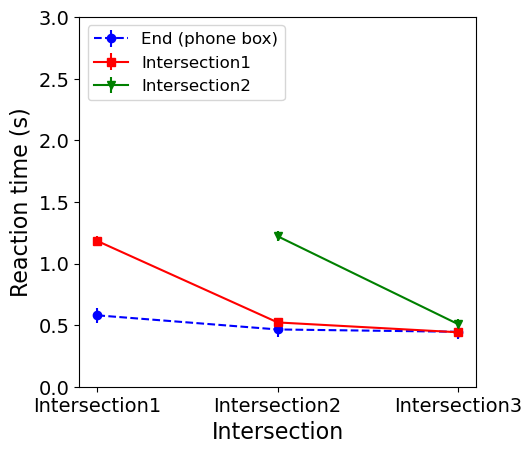

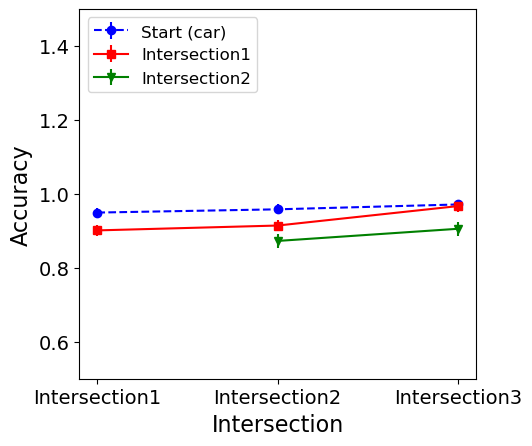

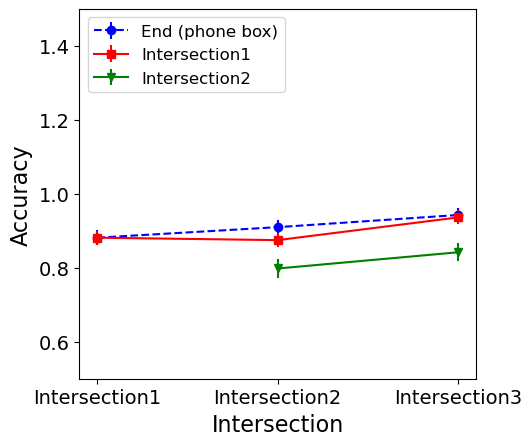

In [54]:
# Plot the average reaction time and accuracy for all subjects based on raw data
import os
import matplotlib.pyplot as plt
import pandas as pd

base_dir = 'S:/GSani/JieSong/1.Data/raw_data'
figure_path = os.path.join(base_dir, 'figures')
aver_path = os.path.join(base_dir, 'figures', 'aver_rt_acc')
if not os.path.exists(figure_path):
    os.makedirs(figure_path)
# Iterate over each subject directory
for subject_dir in os.listdir(base_dir):
    if not subject_dir.startswith('sub'):
        continue
    input_dir = os.path.join(base_dir, subject_dir, 'condition_behavior')
    out_dir = os.path.join(base_dir, subject_dir, 'merged_behavior')
    
    if not os.path.exists(figure_path):
        os.makedirs(figure_path)
        
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
# Create a DataFrame to store the combined data for repetition and retracing
repe_data = pd.DataFrame()
retra_data = pd.DataFrame()
acc_repe_data = pd.DataFrame()
acc_retra_data = pd.DataFrame()
csv_files = [file for file in os.listdir(aver_path) if file.endswith('combined_aver_rt.csv')]
for csv_file in csv_files:
    csv_path = os.path.join(aver_path, csv_file)
    data = pd.read_csv(csv_path)
    grouped_data = data.groupby(['Intersection', 'Condition'])['rt'].mean()
    sem_data = data.groupby(['Intersection', 'Condition'])['rt'].sem()
    # save the reaction time for each subject to a new csv file
    rt_data = pd.DataFrame({
        'Intersection': grouped_data.index.get_level_values(0),
        'Condition': grouped_data.index.get_level_values(1),
        'rt': grouped_data.values,
        'rt_sem': sem_data.values  # Include SEM if needed
    })
        
        # Define output path for each subject's file
    output_file = os.path.join(out_dir, f'{subject_dir}_{os.path.splitext(csv_file)[0]}_average_rt.csv')
        
    # Save the DataFrame to CSV
    rt_data.to_csv(output_file, index=False)
    if 'repetition' in csv_file:
        combined_repe_data = pd.concat([repe_data, rt_data], ignore_index=True)
        repe_data = combined_repe_data
    elif 'retracing' in csv_file:
        combined_retra_data = pd.concat([retra_data, rt_data], ignore_index=True)
        retra_data = combined_retra_data

combined_repe_file = os.path.join(aver_path, 'all_subjects_repetition_aver_rt.csv')
combined_retra_file = os.path.join(aver_path, 'all_subjects_retracing_aver_rt.csv')
repe_data.to_csv(combined_repe_file, index=False)
retra_data.to_csv(combined_retra_file, index=False)

combined_repe = pd.read_csv(combined_repe_file)
grouped_data = combined_repe.groupby(['Intersection', 'Condition'])['rt'].mean()
sem_data = combined_repe.groupby(['Intersection', 'Condition'])['rt'].sem()

fig, ax2 = plt.subplots()
repe_Car_data = grouped_data.loc(axis=0)[:, 'Car']
repe_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
repe_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
plt.errorbar(repe_Car_data.index.get_level_values(0), repe_Car_data.values,
            yerr=sem_data.loc[('Intersection1', 'Car')], 
            marker='o', label='Start (car)', color='blue', linestyle='--')
plt.errorbar(repe_C2_data.index.get_level_values(0), repe_C2_data.values,
            yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
            marker='s', label='Intersection1', color='red', linestyle='-')
plt.errorbar(repe_C3_data.index.get_level_values(0), repe_C3_data.values,
            yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
            marker='v', label='Intersection2', color='green', linestyle='-')

plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Reaction time (s)', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=12)
figure_dir = os.path.join(figure_path, f'all_subjects_repetition_aver_rt_raw.png')
plt.savefig(figure_dir, transparent=True)
plt.show()

combined_retra = pd.read_csv(combined_retra_file)
grouped_data = combined_retra.groupby(['Intersection', 'Condition'])['rt'].mean()
sem_data = combined_retra.groupby(['Intersection', 'Condition'])['rt'].sem()
fig, ax2 = plt.subplots()
retra_Car_data = grouped_data.loc(axis=0)[:, 'PhoneBox']
retra_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
retra_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
plt.errorbar(retra_Car_data.index.get_level_values(0), retra_Car_data.values,
            yerr=sem_data.loc[('Intersection1', 'PhoneBox')], 
            marker='o', label='End (phone box)', color='blue', linestyle='--')
plt.errorbar(retra_C2_data.index.get_level_values(0), retra_C2_data.values,
            yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
            marker='s', label='Intersection1', color='red', linestyle='-')
plt.errorbar(retra_C3_data.index.get_level_values(0), retra_C3_data.values,
            yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
            marker='v', label='Intersection2', color='green', linestyle='-')
plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Reaction time (s)', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=12)
figure_dir = os.path.join(figure_path, f'all_subjects_retracing_aver_rt_raw.png')
plt.savefig(figure_dir, transparent=True)
plt.show()



###### ACC
csv_files2 = [file for file in os.listdir(aver_path) if
                file.endswith('combined_aver_acc.csv')]

for csv_file in csv_files2:
    csv_path = os.path.join(aver_path, csv_file)
    data = pd.read_csv(csv_path)
    grouped_data = data.groupby(['Intersection', 'Condition'])['accuracy'].mean()
    sem_data = data.groupby(['Intersection', 'Condition'])['accuracy'].sem()
    acc_data = pd.DataFrame()
    acc_data['Intersection'] = grouped_data.index.get_level_values(0)
    acc_data['Condition'] = grouped_data.index.get_level_values(1)
    acc_data['accuracy'] = grouped_data.values
    if 'repetition' in csv_file:
        combined_repe_data = pd.concat([acc_repe_data, acc_data], ignore_index=True)
        acc_repe_data = combined_repe_data
    elif 'retracing' in csv_file:
        combined_retra_data = pd.concat([acc_retra_data, acc_data], ignore_index=True)
        acc_retra_data = combined_retra_data

combined_repe_file = os.path.join(aver_path, 'all_subjects_repetition_aver_acc.csv')
combined_retra_file = os.path.join(aver_path, 'all_subjects_retracing_aver_acc.csv')
acc_repe_data.to_csv(combined_repe_file, index=False)
acc_retra_data.to_csv(combined_retra_file, index=False)

combined_repe = pd.read_csv(combined_repe_file)
grouped_data = combined_repe.groupby(['Intersection', 'Condition'])['accuracy'].mean()
sem_data = combined_repe.groupby(['Intersection', 'Condition'])['accuracy'].sem()
fig, ax2 = plt.subplots()
repe_Car_data = grouped_data.loc(axis=0)[:, 'Car']
repe_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
repe_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
plt.errorbar(repe_Car_data.index.get_level_values(0), repe_Car_data.values,
            yerr=sem_data.loc[('Intersection1', 'Car')], 
            marker='o', label='Start (car)', color='blue', linestyle='--')
plt.errorbar(repe_C2_data.index.get_level_values(0), repe_C2_data.values,
            yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
            marker='s', label='Intersection1', color='red', linestyle='-')
plt.errorbar(repe_C3_data.index.get_level_values(0), repe_C3_data.values,
            yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
            marker='v', label='Intersection2', color='green', linestyle='-')

plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=12)
figure_dir = os.path.join(figure_path, f'all_subjects_repetition_aver_acc_raw.png')
plt.savefig(figure_dir, transparent=True)
plt.show()

combined_retra = pd.read_csv(combined_retra_file)
grouped_data = combined_retra.groupby(['Intersection', 'Condition'])['accuracy'].mean()
sem_data = combined_retra.groupby(['Intersection', 'Condition'])['accuracy'].sem()
fig, ax2 = plt.subplots()
retra_Car_data = grouped_data.loc(axis=0)[:, 'PhoneBox']
retra_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
retra_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
plt.errorbar(retra_Car_data.index.get_level_values(0), retra_Car_data.values,
            yerr=sem_data.loc[('Intersection1', 'PhoneBox')], 
            marker='o', label='End (phone box)', color='blue', linestyle='--')
plt.errorbar(retra_C2_data.index.get_level_values(0), retra_C2_data.values,
            yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
            marker='s', label='Intersection1', color='red', linestyle='-')
plt.errorbar(retra_C3_data.index.get_level_values(0), retra_C3_data.values,
            yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
            marker='v', label='Intersection2', color='green', linestyle='-')
plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=12)
figure_dir = os.path.join(figure_path, f'all_subjects_retracing_aver_acc_raw.png')
plt.savefig(figure_dir, transparent=True)
plt.show()

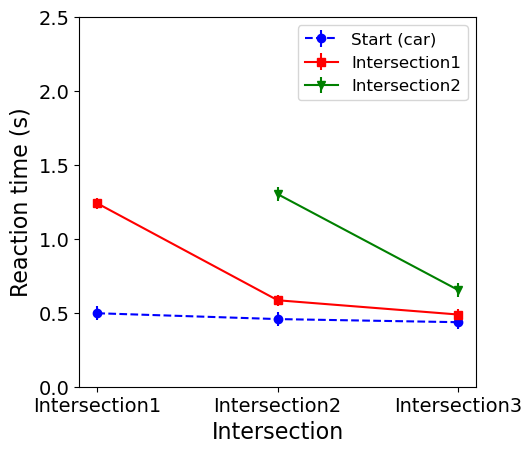

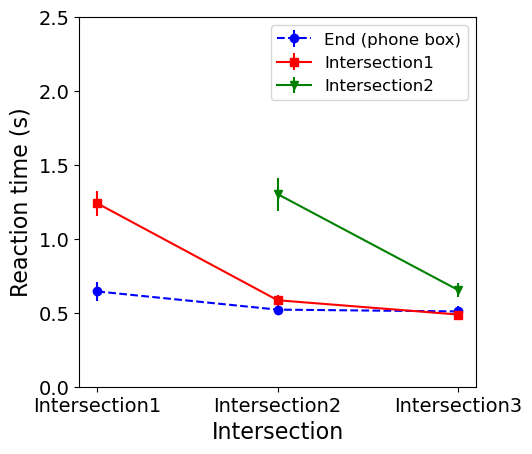

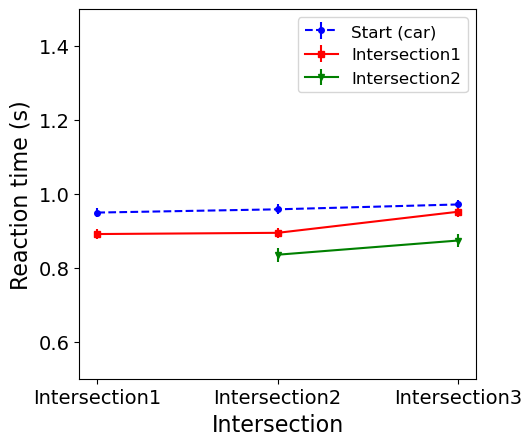

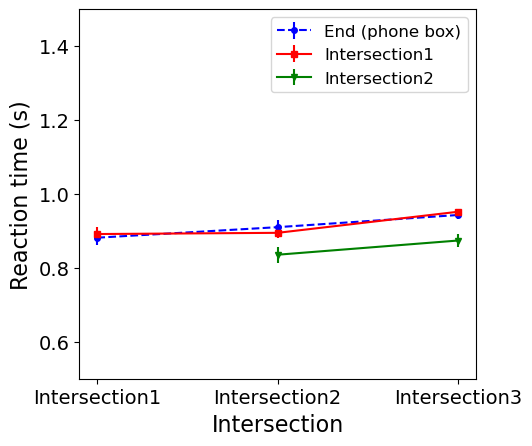

In [ ]:
import os
import pandas as pd
all_subjects_rt_data = pd.DataFrame()
for subject_dir in os.listdir(base_dir):
    if not subject_dir.startswith('sub'):
        continue

    input_dir = os.path.join(base_dir, subject_dir, 'condition_behavior')
    out_dir = os.path.join(base_dir, subject_dir, 'merged_behavior')

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # Initialize an empty DataFrame to hold all data for the subject
    all_data = pd.DataFrame()

    csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]

    # Step 1: Concatenate data from all CSV files for the subject
    for csv_file in csv_files:
        csv_path = os.path.join(input_dir, csv_file)
        data = pd.read_csv(csv_path)
        
        if len(data.columns) == 1:
            data = pd.read_csv(csv_path, sep=';')

        data.columns = data.columns.str.strip()
        
        # Append the data to the all_data DataFrame
        all_data = pd.concat([all_data, data], ignore_index=True)

    # Step 2: Group by Intersection and Condition across all trials and CSV files fot rt and accuracy
    grouped_data = all_data.groupby(['Intersection', 'Condition'])['rt'].mean()
    sem_data = all_data.groupby(['Intersection', 'Condition'])['rt'].sem()

    # Step 3: Create a DataFrame for the final output
    rt_data = pd.DataFrame({
        'Intersection': grouped_data.index.get_level_values(0),
        'Condition': grouped_data.index.get_level_values(1),
        'rt': grouped_data.values,
        'rt_sem': sem_data.values  # Include SEM if needed
    })

    # Define output path for the averaged RT data
    output_file = os.path.join(out_dir, f'{subject_dir}_average_rt.csv')
    
    # Save the final averaged data to CSV
    rt_data.to_csv(output_file, index=False)
    if 'repetition' in csv_file:
        combined_repe_data = pd.concat([repe_data, rt_data], ignore_index=True)
        repe_data = combined_repe_data
    elif 'retracing' in csv_file:
        combined_retra_data = pd.concat([retra_data, rt_data], ignore_index=True)
        retra_data = combined_retra_data
    # concat the _average_rt.csv files from each subject folder for all subjects and plot the average reaction time for all subjects
        # Path to the average RT file for each subject
    avg_rt_file = os.path.join(base_dir, subject_dir, 'merged_behavior', f'{subject_dir}_average_rt.csv')
    
    if os.path.exists(avg_rt_file):
        subject_data = pd.read_csv(avg_rt_file)
        all_subjects_rt_data = pd.concat([all_subjects_rt_data, subject_data], ignore_index=True)

# Step 4: Group by Intersection and Condition, calculate mean RT and SEM across all subjects
grouped_data = all_subjects_rt_data.groupby(['Intersection', 'Condition'])['rt'].mean()
sem_data = all_subjects_rt_data.groupby(['Intersection', 'Condition'])['rt'].sem()

fig, ax2 = plt.subplots()
repe_Car_data = grouped_data.loc(axis=0)[:, 'Car']
repe_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
repe_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
plt.errorbar(repe_Car_data.index.get_level_values(0), repe_Car_data.values,
            yerr=sem_data.loc[('Intersection1', 'Car')], 
            marker='o', label='Start (car)', color='blue', linestyle='--', markersize=4)
plt.errorbar(repe_C2_data.index.get_level_values(0), repe_C2_data.values,
            yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
            marker='s', label='Intersection1', color='red', linestyle='-', markersize=4)
plt.errorbar(repe_C3_data.index.get_level_values(0), repe_C3_data.values,
            yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
            marker='v', label='Intersection2', color='green', linestyle='-', markersize=4)

plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Reaction time (s)', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0, 2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
figure_dir = os.path.join(figure_path, f'all_subjects_repetition_aver_rt.png')
plt.savefig(figure_dir, transparent=True)
plt.show()

# Using .loc to select relevant intersections and conditions
retra_Car_data = grouped_data.loc(axis=0)[:, 'PhoneBox']
retra_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
retra_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']

fig, ax2 = plt.subplots()
plt.errorbar(retra_Car_data.index.get_level_values(0), retra_Car_data.values,
             yerr=sem_data.loc(axis=0)[:, 'PhoneBox'], 
             marker='o', label='End (phone box)', color='blue', linestyle='--', markersize=4)
plt.errorbar(retra_C2_data.index.get_level_values(0), retra_C2_data.values,
             yerr=sem_data.loc(axis=0)[:, 'Intersection1'], 
             marker='s', label='Intersection1', color='red', linestyle='-', markersize=4)
plt.errorbar(retra_C3_data.index.get_level_values(0), retra_C3_data.values,
             yerr=sem_data.loc(axis=0)[:, 'Intersection2'], 
             marker='v', label='Intersection2', color='green', linestyle='-', markersize=4)

# Labeling and formatting the plot
plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Reaction time (s)', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0, 2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Save and show the figure
figure_dir = os.path.join(figure_path, 'all_subjects_retracing_aver_rt.png')
plt.savefig(figure_dir, transparent=True)
plt.show()


##ACC
all_subjects_acc_data = pd.DataFrame()
csv_files2 = [file for file in os.listdir(aver_path) if
                file.endswith('combined_aver_acc.csv')]

for subject_dir in os.listdir(base_dir):
    all_subjects_acc_data = pd.DataFrame()
for subject_dir in os.listdir(base_dir):
    if not subject_dir.startswith('sub'):
        continue

    input_dir = os.path.join(base_dir, subject_dir, 'condition_behavior')
    out_dir = os.path.join(base_dir, subject_dir, 'merged_behavior')

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # Initialize an empty DataFrame to hold all data for the subject
    all_data = pd.DataFrame()
    csv_files2 = [file for file in os.listdir(input_dir) if file.endswith('.csv')]
    # Step 1: Concatenate data from all CSV files for the subject
    for csv_file in csv_files2:
        csv_path = os.path.join(input_dir, csv_file)
        data = pd.read_csv(csv_path)
        
        if len(data.columns) == 1:
            data = pd.read_csv(csv_path, sep=';')

        data.columns = data.columns.str.strip()
        # Append the data to the all_data DataFrame
        all_data = pd.concat([all_data, data], ignore_index=True)
    # Step 2: Group by Intersection and Condition across all trials and CSV files fot rt and accuracy
    grouped_data = all_data.groupby(['Intersection', 'Condition'])['accuracy'].mean()
    sem_data = all_data.groupby(['Intersection', 'Condition'])['accuracy'].sem()

    # Step 3: Create a DataFrame for the final output
    rt_data = pd.DataFrame({
        'Intersection': grouped_data.index.get_level_values(0),
        'Condition': grouped_data.index.get_level_values(1),
        'accuracy': grouped_data.values,
        'accuracy_sem': sem_data.values  # Include SEM if needed
    })

    # Define output path for the averaged RT data
    output_file = os.path.join(out_dir, f'{subject_dir}_average_acc.csv')
    
    # Save the final averaged data to CSV
    rt_data.to_csv(output_file, index=False)
    if 'repetition' in csv_file:
        combined_repe_data = pd.concat([repe_data, rt_data], ignore_index=True)
        repe_data = combined_repe_data
    elif 'retracing' in csv_file:
        combined_retra_data = pd.concat([retra_data, rt_data], ignore_index=True)
        retra_data = combined_retra_data
    # concat the _average_rt.csv files from each subject folder for all subjects and plot the average reaction time for all subjects
        # Path to the average RT file for each subject
    avg_rt_file = os.path.join(base_dir, subject_dir, 'merged_behavior', f'{subject_dir}_average_acc.csv')
    
    if os.path.exists(avg_rt_file):
        subject_data = pd.read_csv(avg_rt_file)
        all_subjects_rt_data = pd.concat([all_subjects_rt_data, subject_data], ignore_index=True)

# Step 4: Group by Intersection and Condition, calculate mean RT and SEM across all subjects
grouped_data = all_subjects_rt_data.groupby(['Intersection', 'Condition'])['accuracy'].mean()
sem_data = all_subjects_rt_data.groupby(['Intersection', 'Condition'])['accuracy'].sem()

fig, ax2 = plt.subplots()
repe_Car_data = grouped_data.loc(axis=0)[:, 'Car']
repe_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
repe_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']
plt.errorbar(repe_Car_data.index.get_level_values(0), repe_Car_data.values,
            yerr=sem_data.loc[('Intersection1', 'Car')], 
            marker='o', label='Start (car)', color='blue', linestyle='--', markersize=4)
plt.errorbar(repe_C2_data.index.get_level_values(0), repe_C2_data.values,
            yerr=sem_data.loc[('Intersection2', 'Intersection1')], 
            marker='s', label='Intersection1', color='red', linestyle='-', markersize=4)
plt.errorbar(repe_C3_data.index.get_level_values(0), repe_C3_data.values,
            yerr=sem_data.loc[('Intersection3', 'Intersection2')], 
            marker='v', label='Intersection2', color='green', linestyle='-', markersize=4)

plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Reaction time (s)', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
figure_dir = os.path.join(figure_path, f'all_subjects_repetition_aver_acc.png')
plt.savefig(figure_dir, transparent=True)
plt.show()

# Using .loc to select relevant intersections and conditions
retra_Car_data = grouped_data.loc(axis=0)[:, 'PhoneBox']
retra_C2_data = grouped_data.loc(axis=0)[:, 'Intersection1']
retra_C3_data = grouped_data.loc(axis=0)[:, 'Intersection2']

fig, ax2 = plt.subplots()
plt.errorbar(retra_Car_data.index.get_level_values(0), retra_Car_data.values,
             yerr=sem_data.loc(axis=0)[:, 'PhoneBox'], 
             marker='o', label='End (phone box)', color='blue', linestyle='--', markersize=4)
plt.errorbar(retra_C2_data.index.get_level_values(0), retra_C2_data.values,
             yerr=sem_data.loc(axis=0)[:, 'Intersection1'], 
             marker='s', label='Intersection1', color='red', linestyle='-', markersize=4)
plt.errorbar(retra_C3_data.index.get_level_values(0), retra_C3_data.values,
             yerr=sem_data.loc(axis=0)[:, 'Intersection2'], 
             marker='v', label='Intersection2', color='green', linestyle='-', markersize=4)

# Labeling and formatting the plot
plt.xlabel('Intersection', fontsize=16)
plt.ylabel('Reaction time (s)', fontsize=16)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ylim(0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Save and show the figure
figure_dir = os.path.join(figure_path, 'all_subjects_retracing_aver_acc.png')
plt.savefig(figure_dir, transparent=True)
plt.show()